# Chapter 1 Data Munging Basics

## Segment 1 - Filtering and Segmenting Data

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

### Selecting and Retrieving Data

In [2]:
series_obj = Series(np.arange(8), index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6', 'row 7', 'row 8'])
series_obj

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int32

In [3]:
# ['label-index']
#  (WHAT THIS DOES)
# When you write square brackets with an label-index inside them, this tells python to select and 
# retreive all records with the speciefied label-index. 

series_obj['row 7']




6

In [4]:
# ['integer index']
#  (WHAT THIS DOES)
# When you write square brackets with an integer index inside them, this tells python to select and 
# retreive all records with the speciefied integer index. 
series_obj[[0,7]]

row 1    0
row 8    7
dtype: int32

In [5]:
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape((6,6)), index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6'], columns=['column 1', 'column 2', 'column 3', 'column 4', 'column 5', 'column 6'])
DF_obj

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [7]:
# object name.ix[[row indexes], [colum indexes]]
# (WHAT THIS DOES)
# When you call the .ix[] spcieal idexer, and pass in a set of row and column indexes, this tells 
# python to select and retreive only those specific rows and columns. 

DF_obj.ix[['row 2', 'row 5'], ['column 5', 'column 2']]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,column 5,column 2
row 2,0.402366,0.437611
row 5,0.421004,0.559053


### Data Slicing

In [8]:
# ['stating label-index': 'ending label-index']
# (WHAT THIS DOES)
# Data slicing allows to select and retrieve all records from the starting label-index, to the 
# ending label-index, and every record in between
series_obj['row 3': 'row 7']

row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
dtype: int32

###  Comparing with Scalers

In [9]:
# object name < scaler value
# (WHAT THIS DOES)
# You can use comparison operators (like greater then or less than) to return True / False values for 
# all records, to indicate how each element compares to a scaler value.
DF_obj < .2

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,False,False,False,True,False,True
row 2,False,False,False,False,False,True
row 3,False,False,True,False,False,False
row 4,False,False,False,False,False,False
row 5,False,False,True,False,False,False
row 6,False,False,False,False,False,False


###  Filtering with Scalers

In [10]:
# object name[object_name > scaler value]
# (WHAT THIS DOES)
# You can use also comparison operators and scale values for indexing, to return only the records 
# that satisfy the comparison expression you write. 

series_obj[series_obj > 6]

row 8    7
dtype: int32

###  Settting Values with Scalers

In [11]:
# ['label-index', 'label_index', 'label_index'] = scaler value
# (WHAT THIS DOES)
# Setting is where you select all records associated with the specified label-indexes and set those 
# values equal to a scalar.

series_obj['row 1', 'row 5', 'row 8'] = 8

In [12]:
series_obj

row 1    8
row 2    1
row 3    2
row 4    3
row 5    8
row 6    5
row 7    6
row 8    8
dtype: int32

## Segment 2 - Treating Missing Values

In [1]:
import numpy as np
import pandas as pd

In [2]:
from pandas import Series, DataFrame

### Figuring Out What Data is Missing

In [3]:
missing = np.nan

series_obj = Series(['row 1', 'row 2', missing, 'row 4', 'row 5', 'row 6', missing, 'row 8'])
series_obj

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [4]:
# object_name.isnull()
# (WHAT THIS DOES)
# The .isnull() method returns a Boolean value that describes (True or False) whether an element in a
# Pandas object is a null value.
series_obj.isnull()


0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

### Filling in For Missing Values

In [5]:
np.random.seed(25)
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.232312
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-1.049942
3,1.056610,-0.419678,2.294842,-2.594487,2.822756,0.680889
4,-1.577693,-1.976254,0.533340,-0.290870,-0.513520,1.982626
5,0.226001,-1.839905,1.607671,0.388292,0.399732,0.405477


In [6]:
DF_obj.ix[3:5, 0] = missing
DF_obj.ix[1:4, 5] = missing
DF_obj

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,NaN
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,NaN
3,NaN,-0.419678,2.294842,-2.594487,2.822756,NaN
4,NaN,-1.976254,0.533340,-0.290870,-0.513520,NaN
5,NaN,-1.839905,1.607671,0.388292,0.399732,0.405477


In [7]:
# Object_name.fillna(numberic value)
# (WHAT THIS DOES)
# The .fillna method() finds each missing value from within a Pandas object and fills it with the 
# numberic value that you've passed in.

filled_DF = DF_obj.fillna(0)
filled_DF

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,0.000000
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,0.000000
3,0.000000,-0.419678,2.294842,-2.594487,2.822756,0.000000
4,0.000000,-1.976254,0.533340,-0.290870,-0.513520,0.000000
5,0.000000,-1.839905,1.607671,0.388292,0.399732,0.405477


In [8]:
# object_name.fillna(dict)
# (WHAT THIS DOES)
# You can pass a dictionary into the .fillna() method. The method then fill in missing values 
# from each column Series (as designated by the dictionary key) with its own unique value
# (as specified in the corresponding dictionary value)

filled_DF = DF_obj.fillna({0: 0.1, 5: 1.25})
filled_DF

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,1.250000
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,1.250000
3,0.100000,-0.419678,2.294842,-2.594487,2.822756,1.250000
4,0.100000,-1.976254,0.533340,-0.290870,-0.513520,1.250000
5,0.100000,-1.839905,1.607671,0.388292,0.399732,0.405477


In [9]:
#    (WHAT THIS DOES)
# You can also pass in the method='ffill' argument, and the .fillna() method will fill-forward any 
# missing values with values from the last non-null element in the column Series. 
fill_DF = DF_obj.fillna(method='ffill')
fill_DF

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,-0.222326
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,-0.222326
3,2.152957,-0.419678,2.294842,-2.594487,2.822756,-0.222326
4,2.152957,-1.976254,0.533340,-0.290870,-0.513520,-0.222326
5,2.152957,-1.839905,1.607671,0.388292,0.399732,0.405477


###  Counting Missing Values

In [10]:
np.random.seed(25)
DF_obj = DataFrame(np.random.randn(36).reshape(6,6))
DF_obj.ix[3:5, 0] = missing
DF_obj.ix[1:4, 5] = missing
DF_obj

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,NaN
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,NaN
3,NaN,-0.419678,2.294842,-2.594487,2.822756,NaN
4,NaN,-1.976254,0.533340,-0.290870,-0.513520,NaN
5,NaN,-1.839905,1.607671,0.388292,0.399732,0.405477


In [12]:
# Object_name.isnull().sum()
#    (WHAT THIS DOES)
# To generate a count of how many missing values a DataFrame has per column, just call the .isnull() 
# method off of the object, and then call the .sum() method off of the matrix of Boolean values it
# returns. 

DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

### Filling Out Missing Values

In [14]:
# Object_name.dropna()
#  (WHAT THIS DOES)
# To identify and drop all rows from a DataFrame that contain ANY missing values, simply call the
# .dropna() method off of the DataFrame object. NOTE: If you wanted to drop columns that contain
# any missing values, you'd just pass in the axis=1 argument to select and search the DataFrame 
# by columns, instead of by rows. 

DF_no_NAN = DF_obj.dropna()
DF_no_NAN

,0,1,2,3,4,5
0,0.228273,1.02689,-0.839585,-0.591182,-0.956888,-0.222326


In [15]:
DF_no_NAN = DF_obj.dropna(axis=1)
DF_no_NAN

,1,2,3,4
0,1.026890,-0.839585,-0.591182,-0.956888
1,1.837905,-2.053231,0.868583,-0.920734
2,-1.334661,0.076380,-1.246089,1.202272
3,-0.419678,2.294842,-2.594487,2.822756
4,-1.976254,0.533340,-0.290870,-0.513520
5,-1.839905,1.607671,0.388292,0.399732


In [18]:
# object_name.dropna(how='all')
#    (WHAT THIS DOES)
#  To identify and drop only the rows from a DataFrame that contain All missing values, simply
# call the .dropna() method off of the DataFrame object, and pass in the how='all' argument.
DF_obj.dropna(how = 'all')

,0,1,2,3,4,5
0,0.228273,1.026890,-0.839585,-0.591182,-0.956888,-0.222326
1,-0.619915,1.837905,-2.053231,0.868583,-0.920734,NaN
2,2.152957,-1.334661,0.076380,-1.246089,1.202272,NaN
3,NaN,-0.419678,2.294842,-2.594487,2.822756,NaN
4,NaN,-1.976254,0.533340,-0.290870,-0.513520,NaN
5,NaN,-1.839905,1.607671,0.388292,0.399732,0.405477


## Segment 3 - Removing Duplicates

In [2]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

### Removing Duplicates

In [3]:
DF_obj = DataFrame({'column 1': [1, 1, 2, 2, 3, 3, 3], 
                    'column 2': ['a', 'a', 'b', 'b', 'c', 'c', 'c'], 
                    'column 3': ['A', 'A', 'B', 'B', 'C', 'C', 'C']})

DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [6]:
# object_name.duplicated()
#    (WHAT THIS DOES)
#  The .duplicated() method searches each row in the DataFrame, and returns a True or False value to 
# indicate wheter it is a duplicate of another row found earlier in the DataFrame.

DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [7]:
# object_name.drop_duplicates()
#     (WHAT THIS DOES)
# To drop all duplicate rows, just call the drop_duplicates() method off of the DataFrame

DF_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [8]:
DF_obj = DataFrame({'column 1': [1, 1, 2, 2, 3, 3, 3], 
                    'column 2': ['a', 'a', 'b', 'b', 'c', 'c', 'c'], 
                    'column 3': ['A', 'A', 'B', 'B', 'C', 'D', 'C']})

DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [9]:
# object_name.drop_duplicates(['column_name'])
#    (WHAT THIS DOES)
# to drop the rows that have duplicates in only one column Series, just call drop_duplictes()
# method off the DataFrame, and pass in the label_index of the column you want the de-duplication 
# to be based on. This method drops all rows that have duplicates in the column you specify. 

DF_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


## Segment 4 - Concatenating and Transforming Data

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [2]:
DF_obj = pd.DataFrame(np.arange(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [3]:
DF_obj2 = pd.DataFrame(np.arange(15).reshape(5,3))
DF_obj2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [4]:
# pd.concat([left_object, right_object], axis=1)
#     (WHAT THIS DOES)
#  The concat() method joins data from seprate sources into one combined data table. If you want to
# join objects based on their row index values, just call the pd.concat() method on the objects you 
# want joined, and then pass in the axis=1 argument. The axis=1 argument tells Python to concatenate 
# the DataFrames by adding columns (in other words, joining on the row index values).
pd.concat([DF_obj, DF_obj2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [5]:
pd.concat([DF_obj, DF_obj2])

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


## Transforming Data

### Dropping Data

In [6]:
# object_name.drop([row indexes])
#    (WHAT THIS DOES)
#   You can easily drop rows from a DataFrame by calling the .drop() method and passing in the index 
# values for the rows you want dropped. 

DF_obj.drop([0,2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [7]:
DF_obj.drop([0,2], axis=1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


### Adding Data

In [8]:
series_obj = Series(np.arange(6))
series_obj.name = "added_variable"
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int32

In [9]:
# DataFrame.join(left_object, right_object)
#     (WHAT THIS DOES)
# You can use. .join() method two join two data sources into one. The .join() method works by joining 
# the two sources on their row index values. 

variable_added = DataFrame.join(DF_obj, series_obj)
variable_added

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [10]:
added_datatable = variable_added.append(variable_added, ignore_index=False)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [11]:
added_datatable = variable_added.append(variable_added, ignore_index=True)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


### Sorting Data

In [12]:
# object_name.sort_value(by=[index value], ascending = [False])
#          (WHAT THIS DOES)
# To sort rows in a DataFrame, either in ascending or descending order, call the .sort_values()
# method off of the DataFrame, and pass in the argument to specify the column index upon which
# the DataFrame should be sorted.
DF_sorted = DF_obj.sort_values(by=[5], ascending=[False])
DF_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


## Segment 5 - Grouping and Data Aggregation 

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [2]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'

In [4]:
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
# object_name.groupby('Series_name')
#    (WHAT THIS DOES)
# To group a DataFrame by its values in a particular column, call the .groupby() method off of the DataFrame, and then pass
# in the column Series you want the DataFrame to be grouped by. 

cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


# Chapter 2 Data Visualization

## Segment 1 - Creating Standard Plots (Line, Bar, Pie) 

In [7]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [11]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Creating a line object from a list object

#### Ploating a line chart in Matplotlib

In [12]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

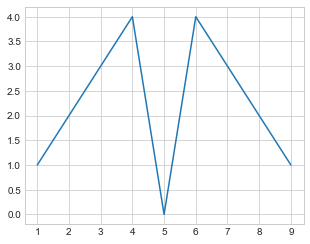

In [13]:
plt.plot(x,y)

#### Ploting a line chart with Pandas objects

In [15]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
mpg = cars['mpg']

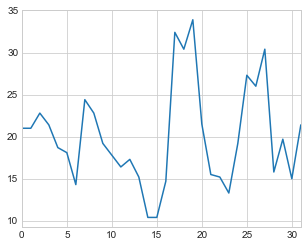

In [16]:
mpg.plot()

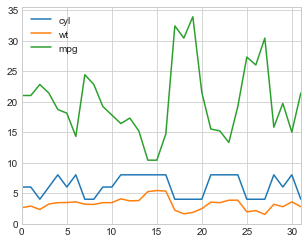

In [19]:
df = cars[['cyl', 'wt', 'mpg']]
df.plot()

### Creating Bar Charts

#### Creating a bar chart from a list

<Container object of 9 artists>

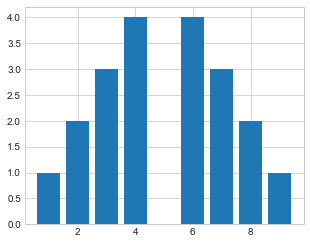

In [20]:
plt.bar(x,y)

#### Creating Bar Charts from Pandas Objects

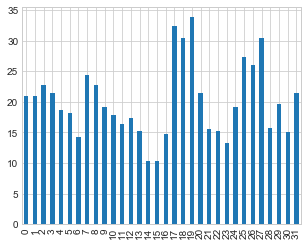

In [21]:
mpg.plot(kind='bar')

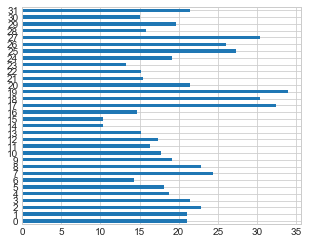

In [22]:
mpg.plot(kind='barh')

### Creating a Pie Chart

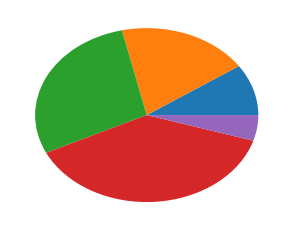

In [23]:
x = [1, 2, 3, 4, 0.5]
plt.pie(x)
plt.show()

#### Saving a Plot

In [25]:
plt.savefig('pie_chart.jpeg')
plt.show()

In [26]:
%pwd

u'C:\\Users\\TehmeerAli\\Desktop\\Tensorflow'

## Segment 2 - Define Elements of a Plot

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

###  Defining axes, ticks and grids

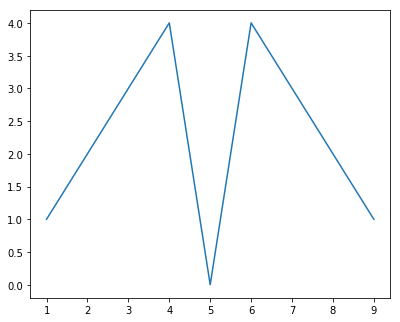

In [4]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.plot(x,y)

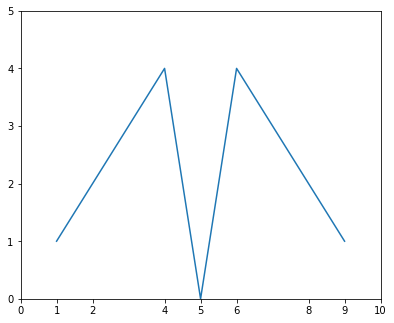

In [6]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0, 1, 2, 4, 5, 6, 8, 9, 10])
ax.set_yticks([0, 1, 2, 3, 4, 5])

ax.plot(x,y)

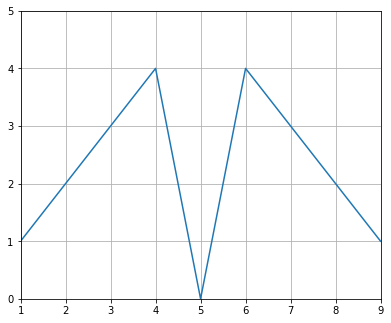

In [7]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

### Generating Multiple Plots in One Figure with Subplots

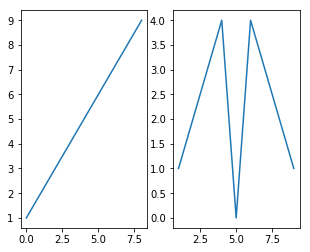

In [8]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x)
ax2.plot(x, y)

## Segment 3- Plot Formatting 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Defining Plot Color

<Container object of 9 artists>

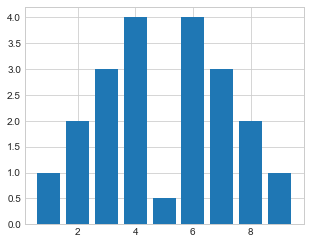

In [4]:
x = range(1, 10)
y = [1, 2, 3, 4, 0.5, 4, 3, 2, 1]

plt.bar(x, y)

<Container object of 9 artists>

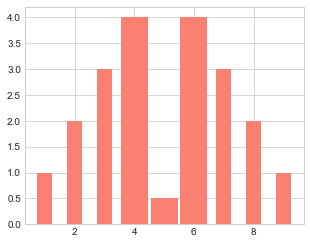

In [5]:
wide = [0.5, 0.5, 0.5, 0.9, 0.9, 0.9, 0.5, 0.5, 0.5]
color = ['salmon']
plt.bar(x, y, width=wide, color=color, align = 'center')

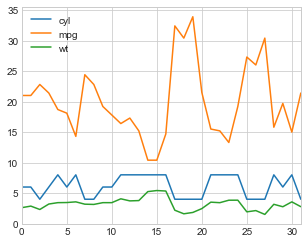

In [6]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

df = cars[['cyl', 'mpg', 'wt']]
df.plot()

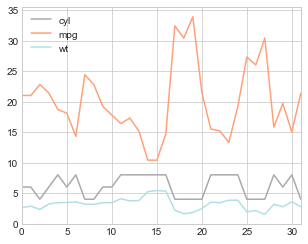

In [7]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']
df.plot(color=color_theme)

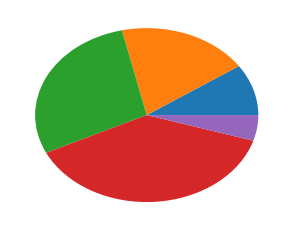

In [8]:
z = [1, 2, 3, 4, 0.5]
plt.pie(z)
plt.show()

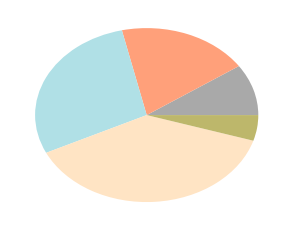

In [9]:
color_theme = ['#A9A9A9', '#FFA07A', '#B0E0E6', '#FFE4C4', '#BDB76B']
plt.pie(z, colors=color_theme)
plt.show()

### Customizing Lines Styles

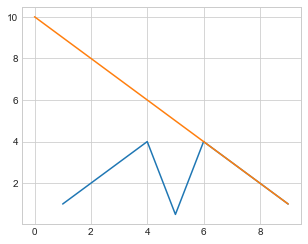

In [10]:
x1 = range(0, 10)
y1 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

plt.plot(x, y)
plt.plot(x1, y1)

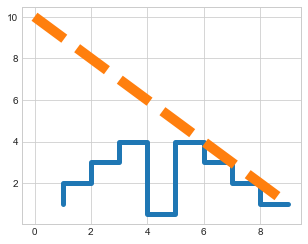

In [11]:
plt.plot(x, y, ls = 'steps', lw=5)
plt.plot(x1, y1, ls = '--', lw=10)

### Setting Plot Markers 

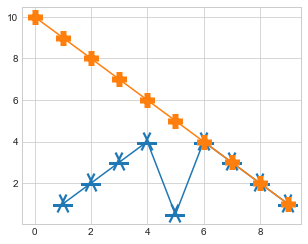

In [12]:
plt.plot(x, y, marker = '1', mew=20)
plt.plot(x1, y1, marker = '+', mew=15)

## Segment 4 - Creating Labels and Annotations

In [16]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb

In [17]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sb.set_style('whitegrid')

### Labeling Plot Features

#### The Functional Method

Text(0,0.5,u'yout y-axis label')

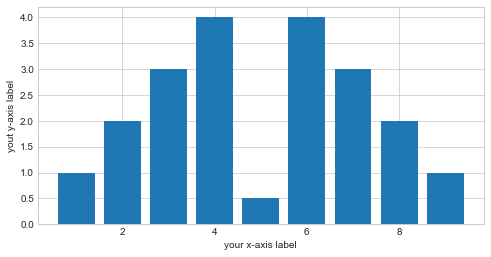

In [18]:
x = range(1, 10)
y = [1, 2, 3, 4, 0.5, 4, 3, 2, 1]
plt.bar(x,y)

plt.xlabel('your x-axis label')
plt.ylabel('yout y-axis label')


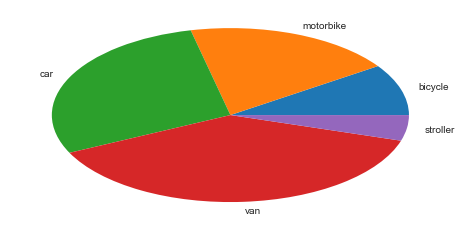

In [19]:
z = [1, 2, 3, 4, 0.5]
veh_type = ['bicycle', 'motorbike', 'car', 'van', 'stroller']
plt.pie(z, labels= veh_type)
plt.show()

Text(0,0.5,u'miles/gal')

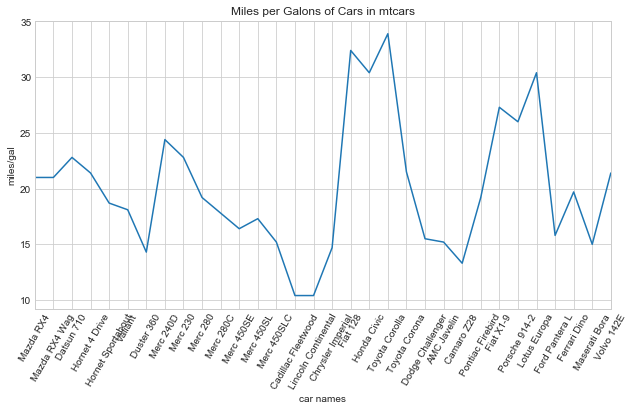

In [22]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Galons of Cars in mtcars')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')


### Adding a Legend to Your Plot

#### The Functional Method

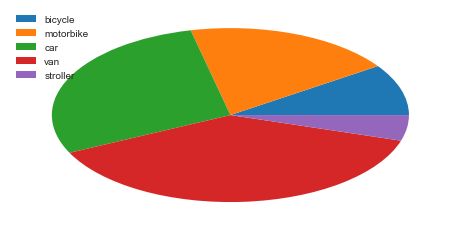

In [23]:
plt.pie(z)
plt.legend(veh_type, loc='best')
plt.show()

#### The Object Oriented Method

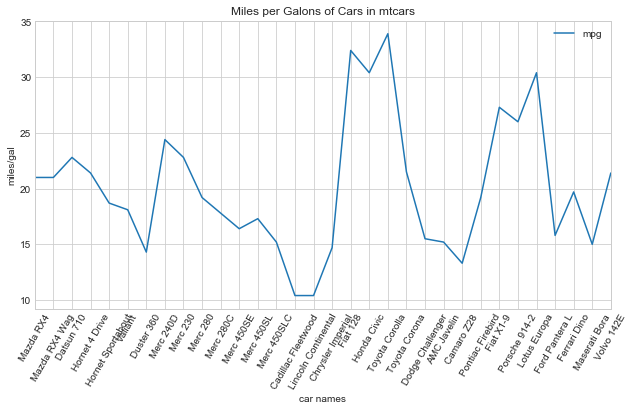

In [26]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Galons of Cars in mtcars')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

ax.legend(loc='best')

### Anotating Your Plot

In [27]:
mpg.max()

33.899999999999999

Text(21,35,u'Toyota Corolla')

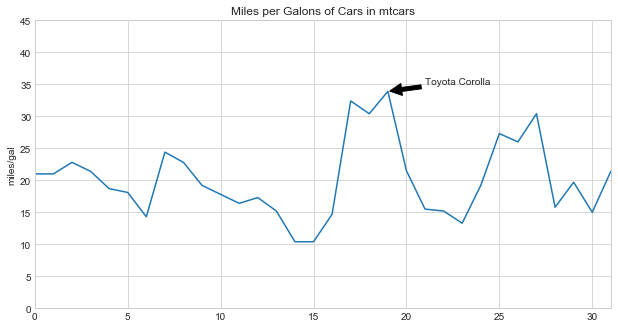

In [28]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
mpg.plot()

ax.set_title('Miles per Galons of Cars in mtcars')
ax.set_ylabel('miles/gal')



ax.set_ylim([0,45])

ax.annotate('Toyota Corolla', xy=(19, 33.9), xytext = (21, 35),
           arrowprops=dict(facecolor='black', shrink=0.05))

## Segment 5 - Creating Visualization from Time Series Data 

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sb.set_style('whitegrid')

### The Simplest Time Series Plot

In [3]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/Superstore-Sales.csv'

In [4]:
df = pd.read_csv(address, index_col = 'Order Date', parse_dates=True)

In [5]:
df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D� Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


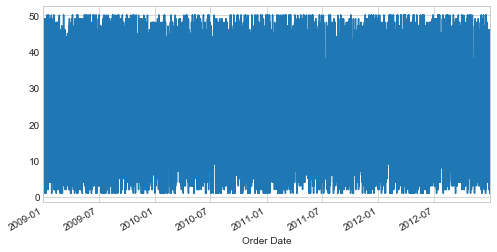

In [6]:
df['Order Quantity'].plot()

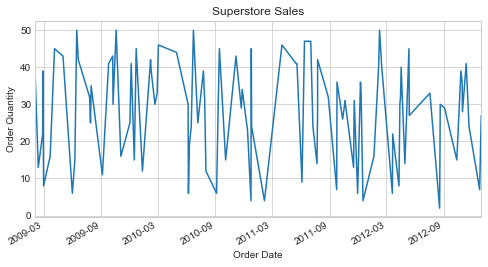

In [7]:
df2 = df.sample(n=100, random_state=25, axis=0)

plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Superstore Sales')

df2['Order Quantity'].plot()

## Segment 6 - Constructing Histograms, Box Plots, and Scatter Plots  

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sb.set_style('whitegrid')

### Eyeballing Dataset Distributions with Histograms

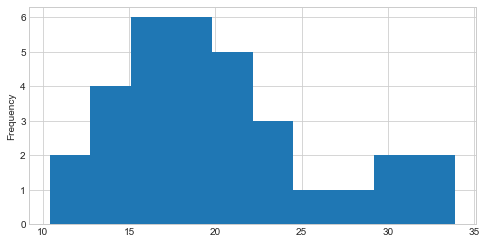

In [3]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names
mpg = cars['mpg']

mpg.plot(kind='hist')

[]

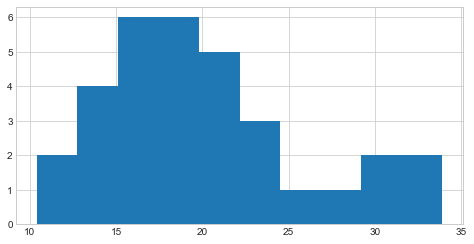

In [15]:
plt.hist(mpg)
plt.plot()

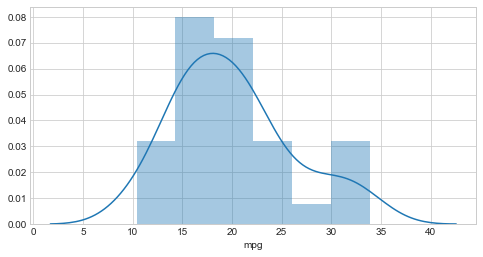

In [16]:
sb.distplot(mpg)

### Seeing Scatterplots in Action

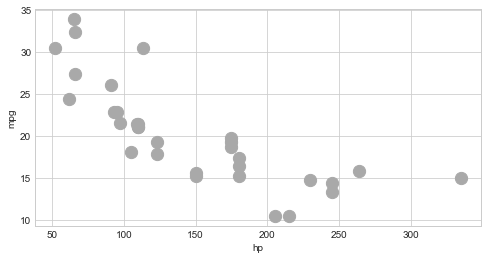

In [17]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['darkgray'], s=150)

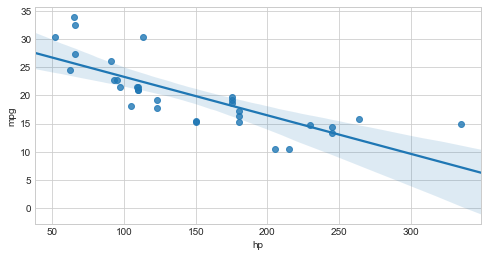

In [18]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

### Generating a Scatter Plot Matrix

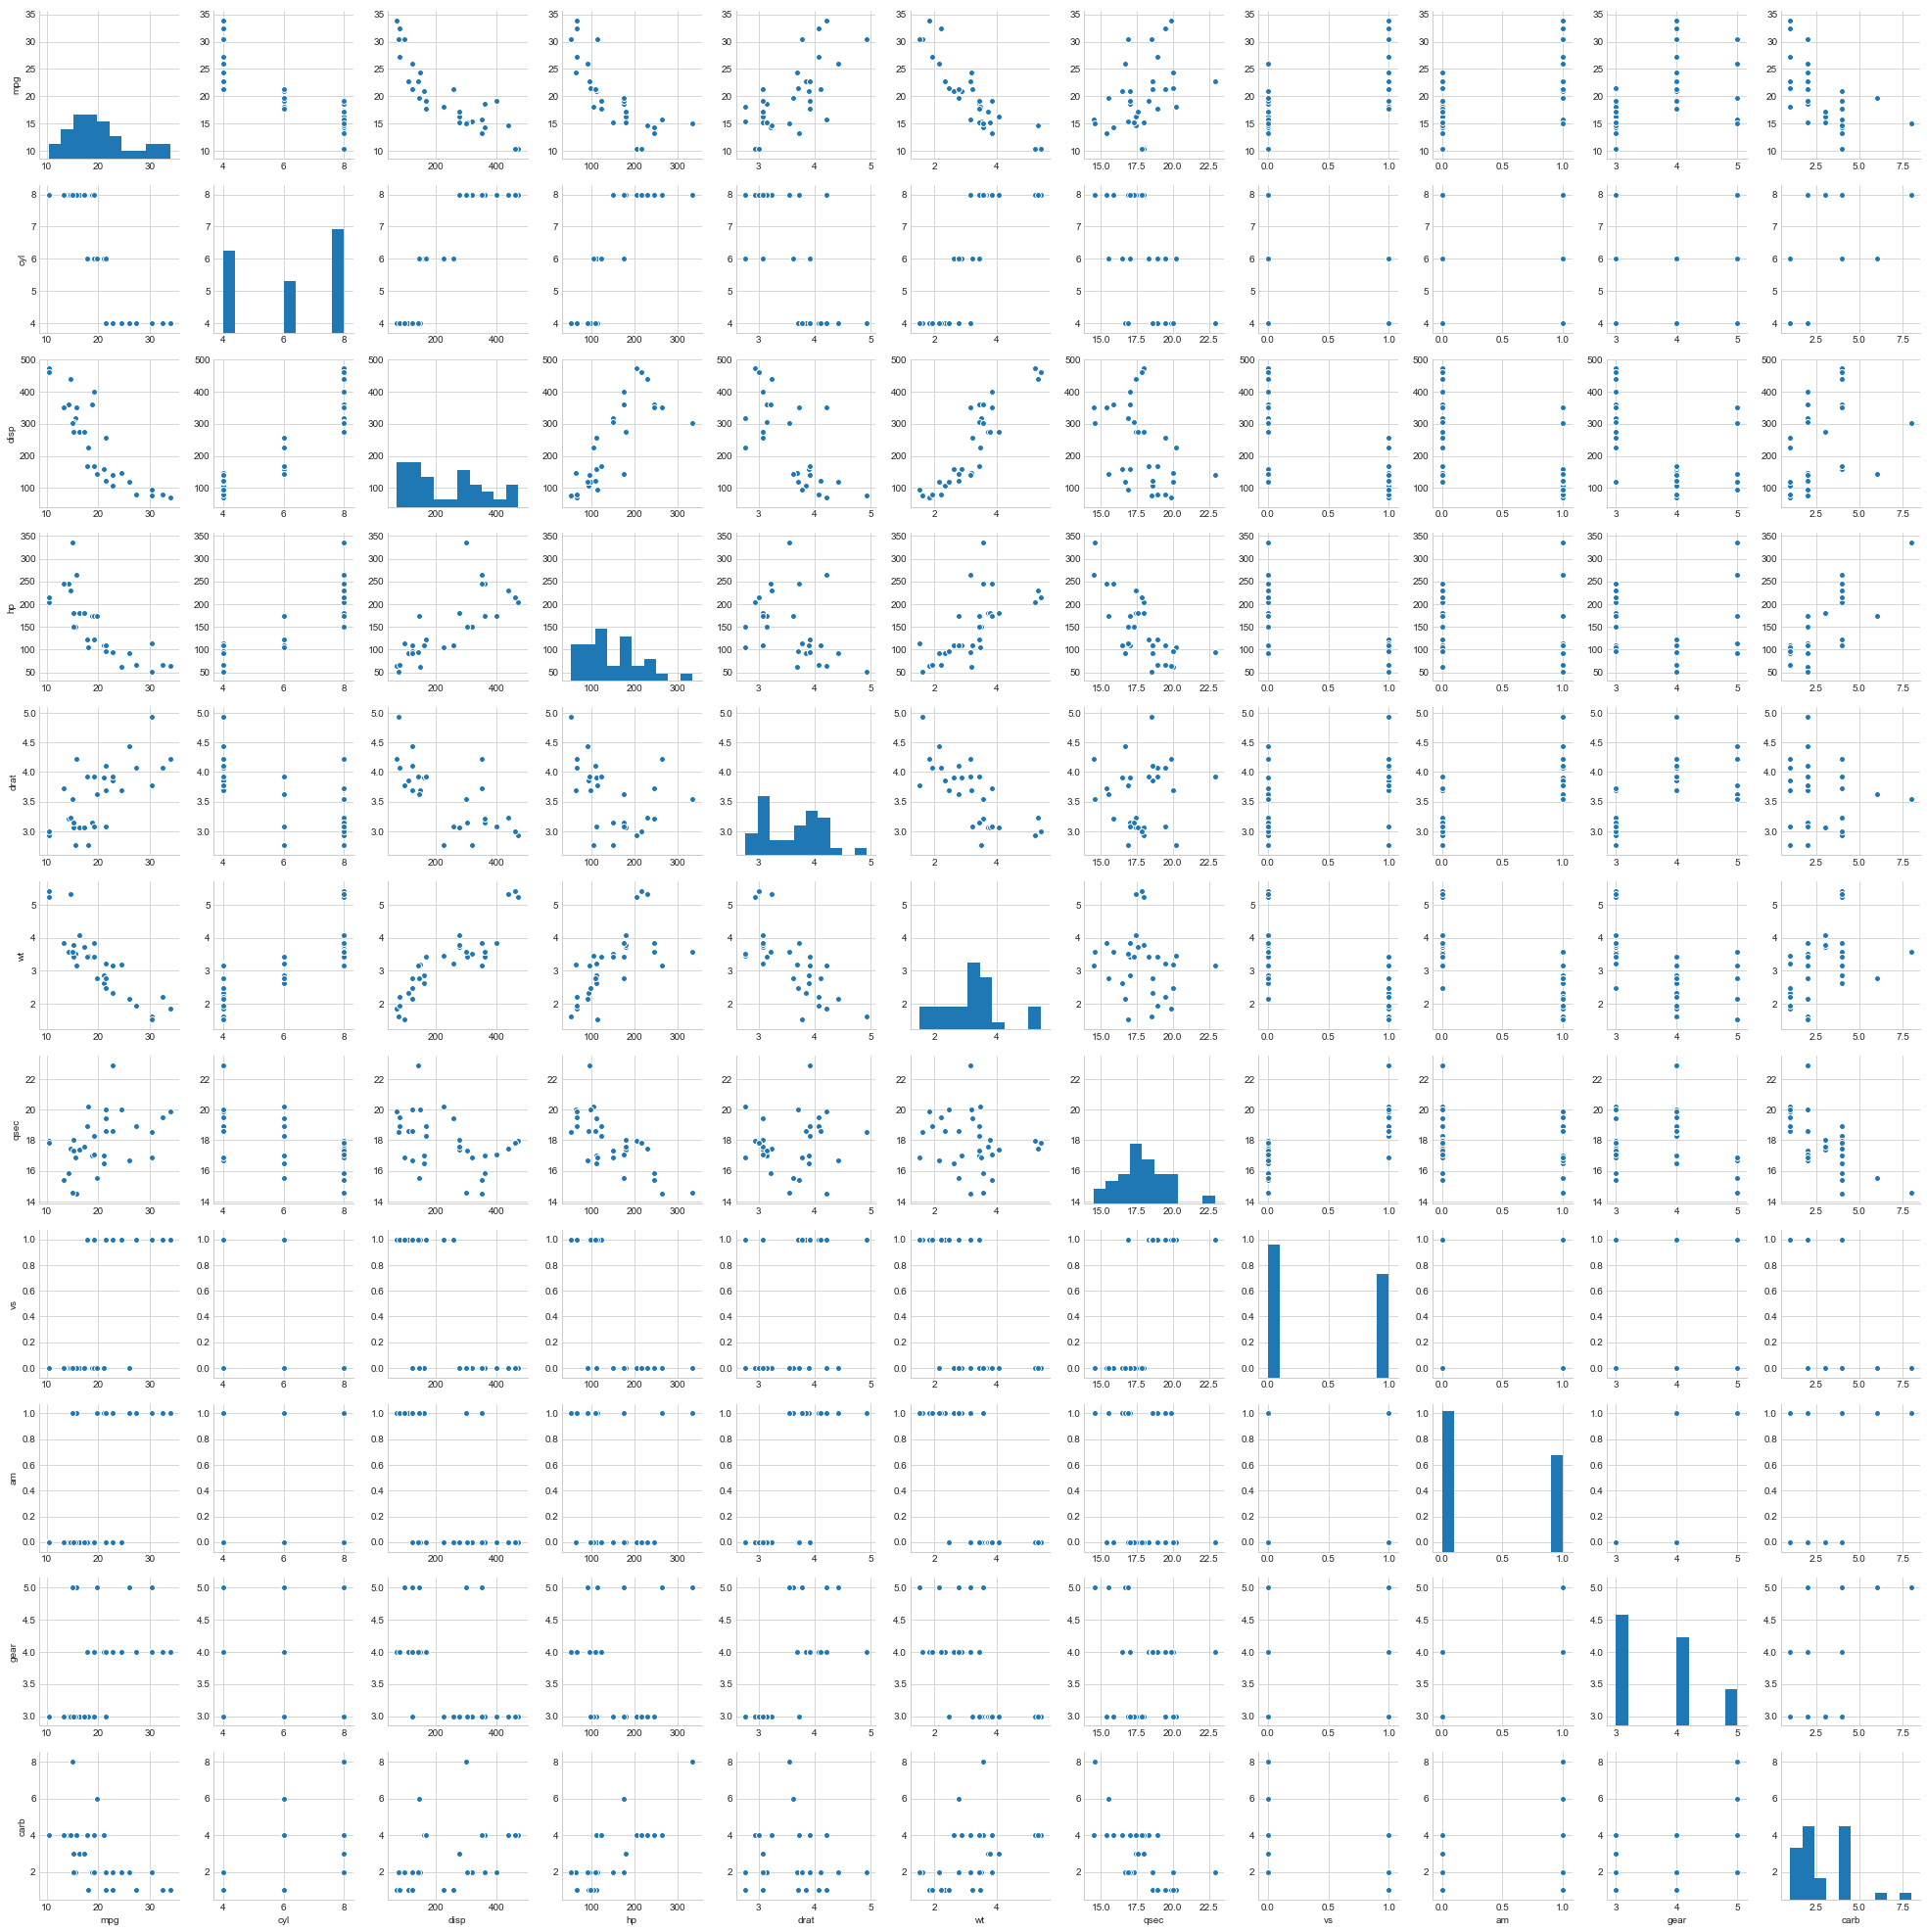

In [19]:
sb.pairplot(cars)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


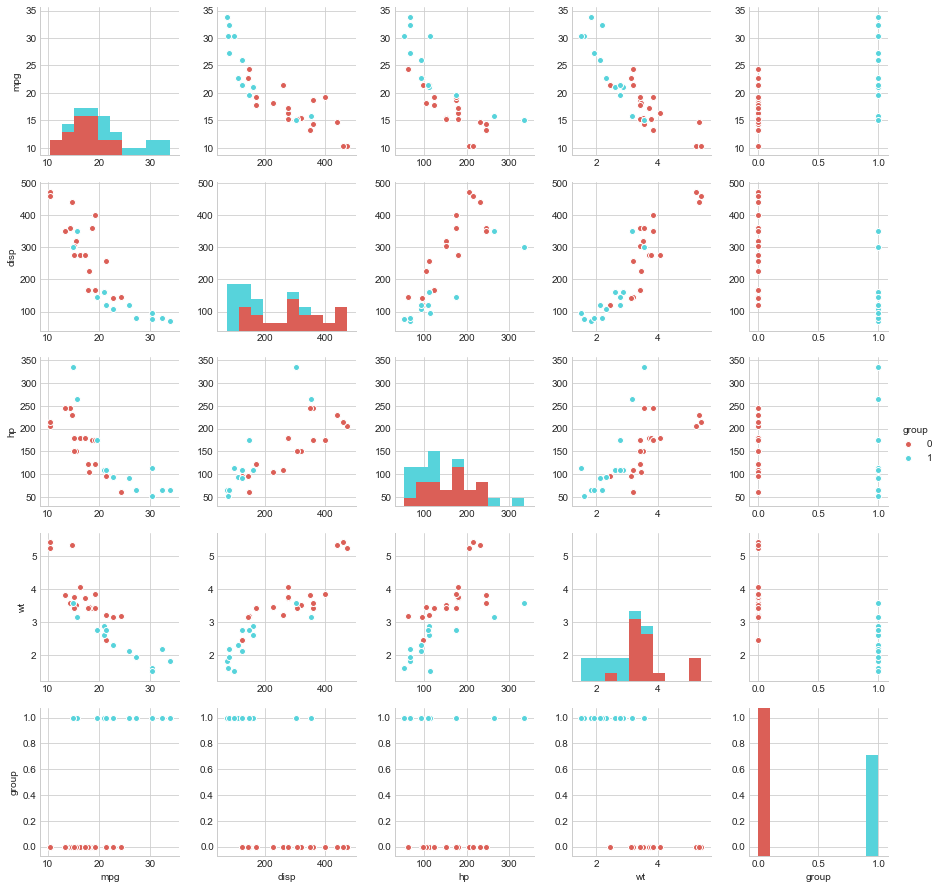

In [4]:
cars_df = pd.DataFrame((cars.ix[:,(1, 3, 4, 6)].values), columns = ['mpg', 'disp', 'hp', 'wt'])
cars_target = cars.ix[:,9].values
target_names = [0, 1]

cars_df['group'] = pd.Series(cars_target, dtype='category')
sb.pairplot(cars_df, hue='group', palette='hls')

In [5]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Building Boxplots

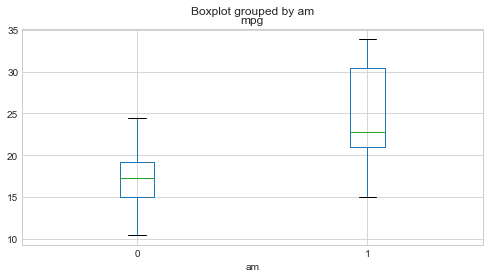

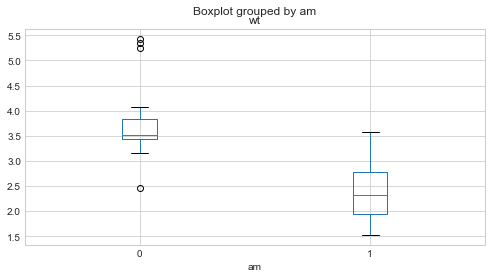

In [8]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

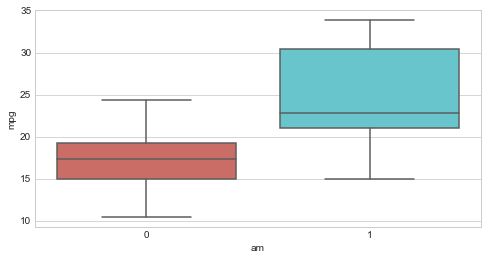

In [9]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

# Chapter 3 - Basic Maths and Statistics

## Segment 1 - Using Numpy to Perform Arithmetic Operations on Data

In [10]:
import numpy as np
from numpy.random import randn

In [11]:
np.set_printoptions(precision=2)

### Creating Arrays

#### Creating Arrays Using a List

In [12]:
a = np.array([1, 2, 3, 4, 5, 6])
a

array([1, 2, 3, 4, 5, 6])

In [14]:
b = np.array([[10, 20, 30], [40, 50, 60]])
b

array([[10, 20, 30],
       [40, 50, 60]])

#### Creating Arrays via Assignment

In [15]:
np.random.seed(25)
c = 36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [17]:
d = np.arange(1,35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

### Performing Arithmetic on Arrays

In [18]:
a*10

array([10, 20, 30, 40, 50, 60])

In [19]:
c + a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [20]:
c - a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [21]:
c * a

array([   8.22,   73.94,  -90.68,  -85.13, -172.24,  -48.02])

In [22]:
c / a

array([  8.22,  18.48, -10.08,  -5.32,  -6.89,  -1.33])

### Multiplying Matrices and Linear Algebra

In [23]:
aa = np.array([[2., 4., 6.], [1., 3., 5.], [10., 20., 30.]])
aa

array([[  2.,   4.,   6.],
       [  1.,   3.,   5.],
       [ 10.,  20.,  30.]])

In [24]:
bb = np.array([[0., 1., 2.], [3., 4., 5.], [6., 7., 8.]])
bb

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [25]:
aa *bb

array([[   0.,    4.,   12.],
       [   3.,   12.,   25.],
       [  60.,  140.,  240.]])

In [26]:
np.dot(aa,bb)

array([[  48.,   60.,   72.],
       [  39.,   48.,   57.],
       [ 240.,  300.,  360.]])

## Segment 2 - Generating Summary Statistics Using Pandas and Scipy 

In [27]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import scipy
from scipy import stats

In [28]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Looking at Summary Statistics that Describe a Variable's Numeric Values

In [29]:
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [30]:
cars.sum(axis=1)

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [31]:
cars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [32]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [33]:
cars.max()

car_names    Volvo 142E
mpg                33.9
cyl                   8
disp                472
hp                  335
drat               4.93
wt                5.424
qsec               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [35]:
mpg = cars.mpg
mpg.idxmax()

19

### Looking at Summary Statistics that Describes Variable Distribution 

In [36]:
cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [37]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [39]:
gear = cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [40]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Segment 3 - Summarizing Categorical Data Using Pandas

In [41]:
import pandas as pd
import numpy as np

### Basics

In [42]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names

cars.head(15)

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
# object_name.value_counts()
#   (WHAT THIS DOES)
# The .value_counts() method makes a count of all unique values in an array or Series object. 



In [43]:
carb = cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [44]:
# object_name.groupby('column index')
#   (WHAT THIS DOES)
# To group a DataFrame by its values in a particular column, call the .groupby() method off the DataFrame
# in the index value of the column Series you want the DataFrame to be grouped by. 

cars_cat = cars[['cyl', 'vs', 'am', 'gear', 'carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [46]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

am                                               carb           ...   \
     count      mean       std  min  25%  50%  75%  max count      mean ...    
gear                                                                    ...    
3     15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0  2.666667 ...    
4     12.0  0.666667  0.492366  0.0  0.0  1.0  1.0  1.0  12.0  2.333333 ...    
5      5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   5.0  4.400000 ...    

      cyl         vs                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     8.0  8.0  15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0  
4     6.0  6.0  12.0  0.833333  0.389249  0.0  1.0  1.0  1.0  1.0  
5     8.0  8.0   5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0  

[3 rows x 32 columns]

### Transforming Variable to Categorical Data Type

In [47]:
# pd.Series(x_variable, dtype)
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To create a Series of categorical data type, call the pd.Series() function on the array or Series that holds the data you
# want the new Series object to contain. When you pass in the dtype="category" argument, this tells Python to assign the new
# Series a data type of "category". Here we create a new categorical Series from the gear variable, and then assign it to a
# new column in the cars DataFrame, called 'group'.

cars['group'] = pd.Series(cars.gear, dtype="category")

In [48]:
cars['group'].dtypes

category

In [49]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

### Describing Categorical Data with Cross Tabs

In [50]:
# pd.crosstab(y_variable, x_variable)
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To create a cross-tab, just call the pd.crosstab() function on the variables you want included in 
# the output table.

pd.crosstab(cars['am'], cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


## Segment 4 - Starting with Parametric Methods in Pandas and Scipy

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy 
from scipy.stats.stats import pearsonr

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
plt.style.use('seaborn-whitegrid')

### The Pearson Correlation

In [8]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

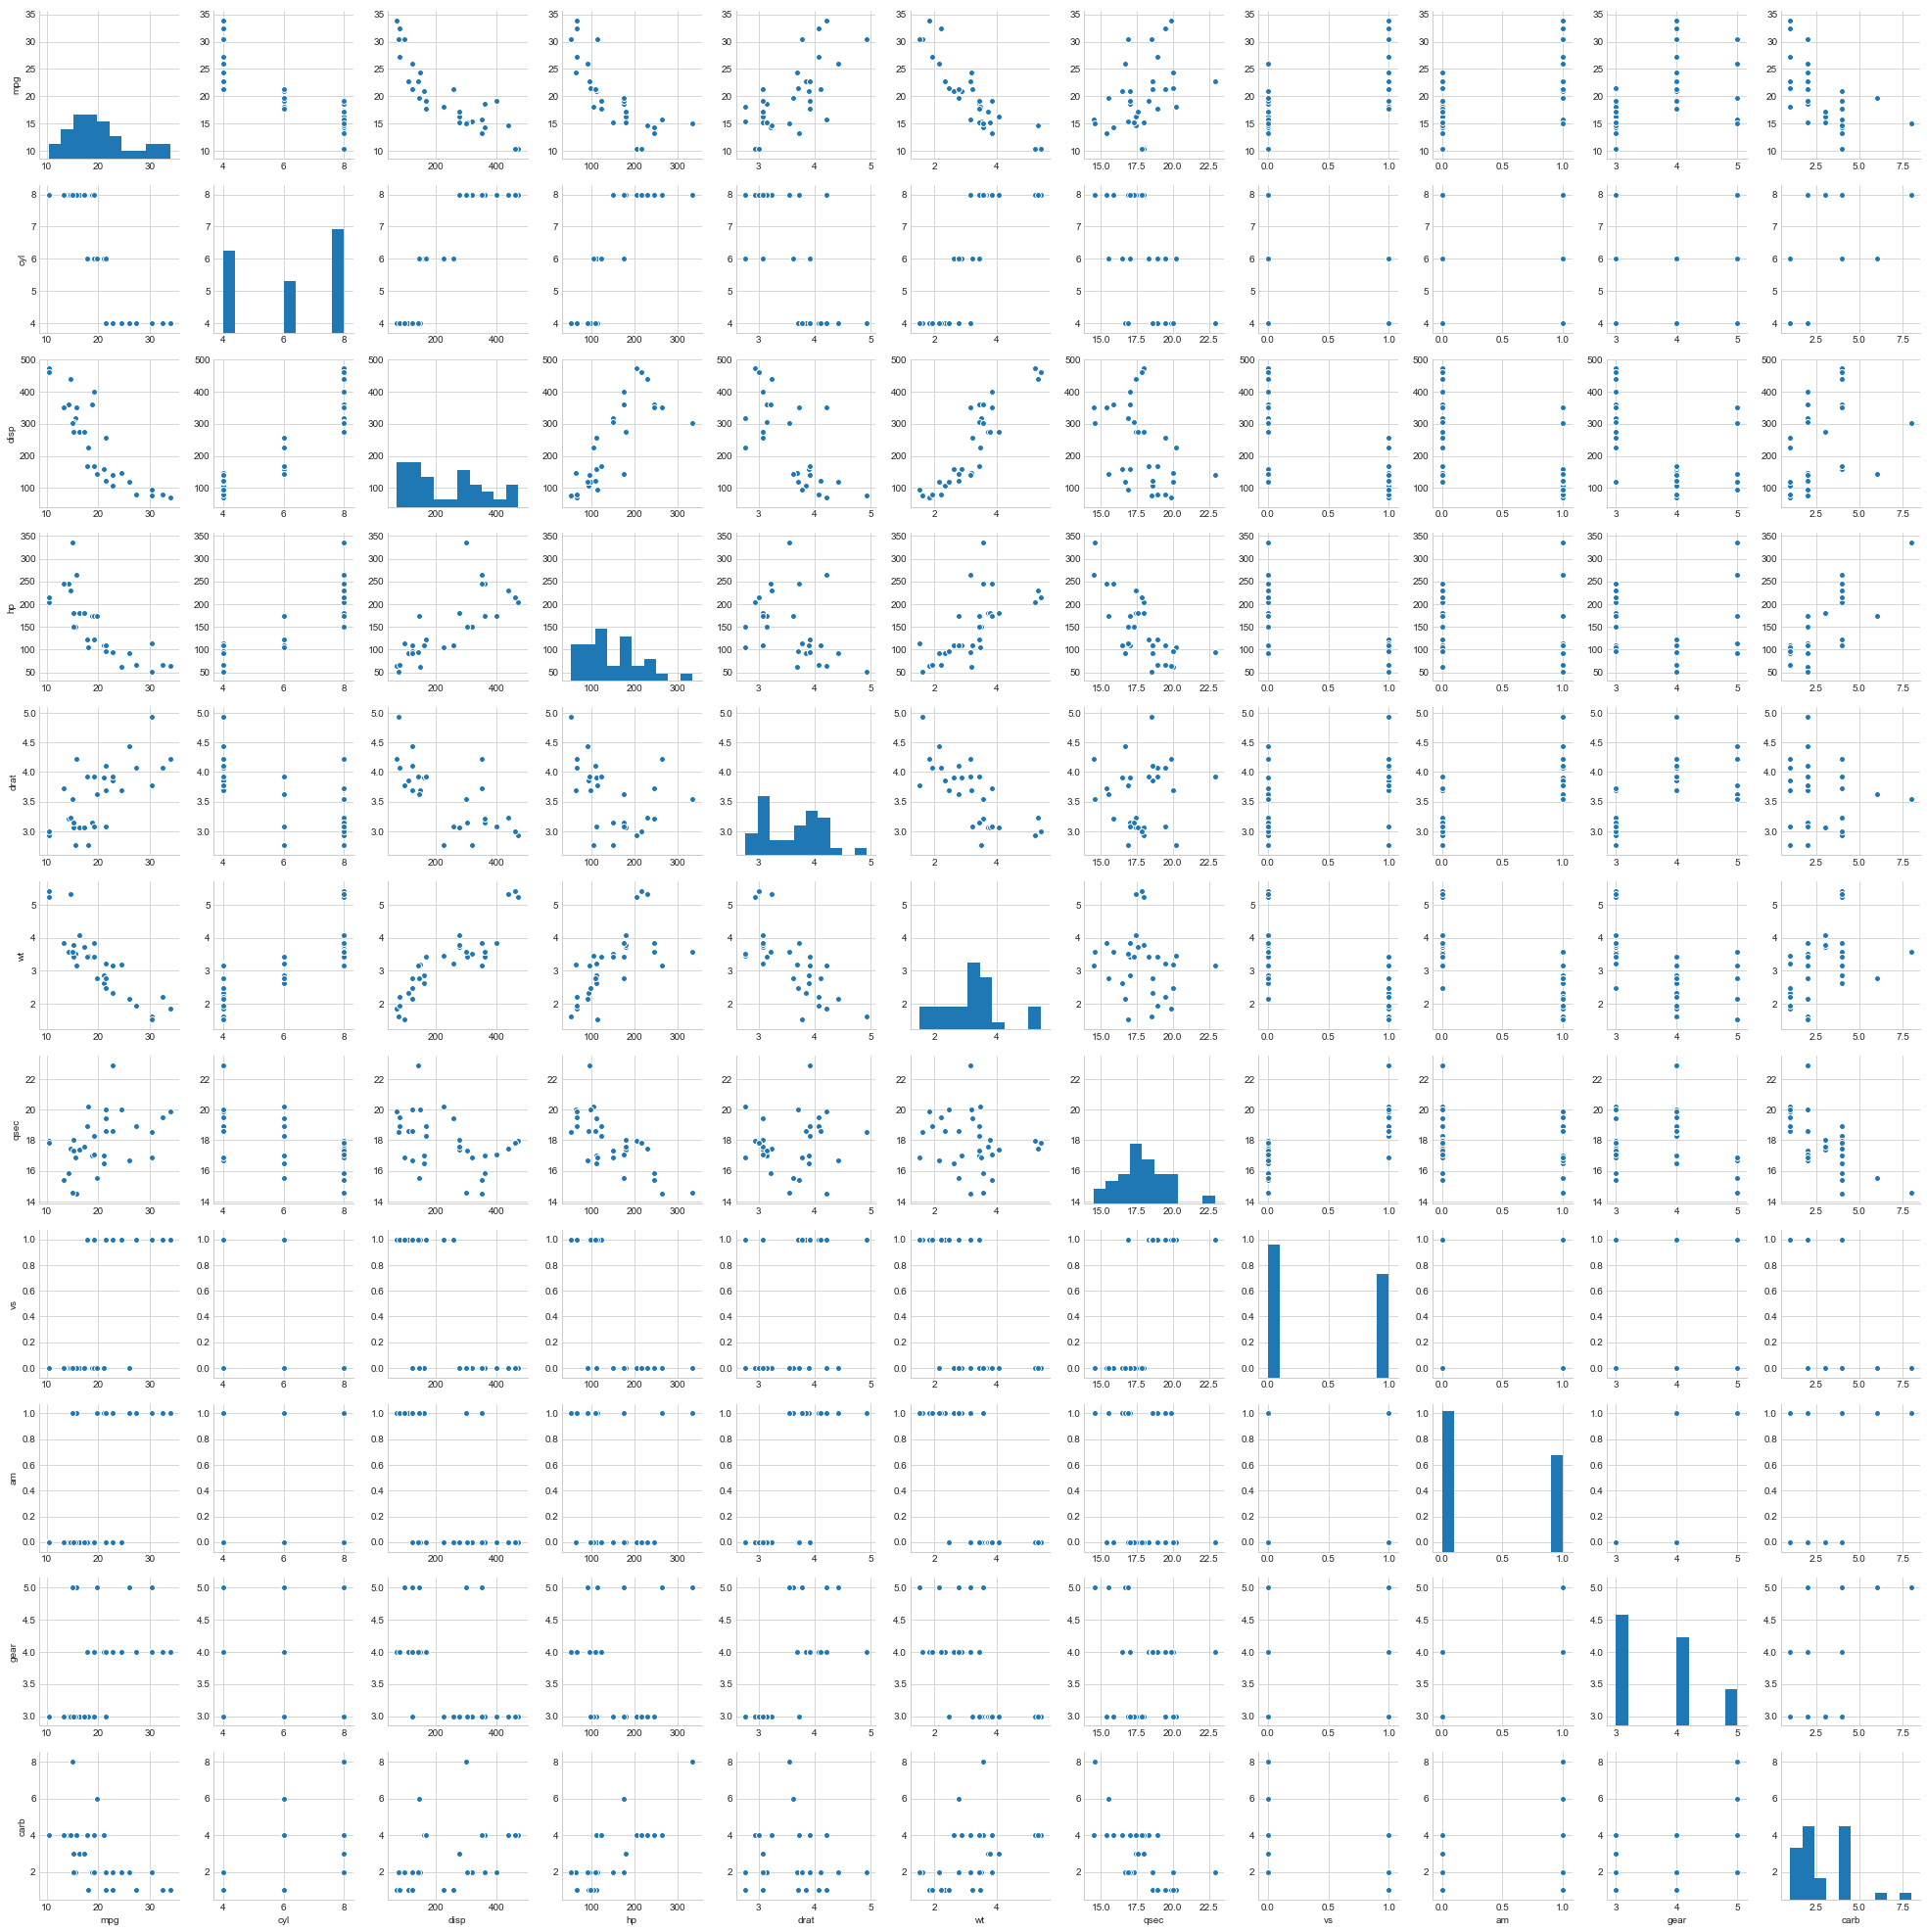

In [9]:
sb.pairplot(cars)

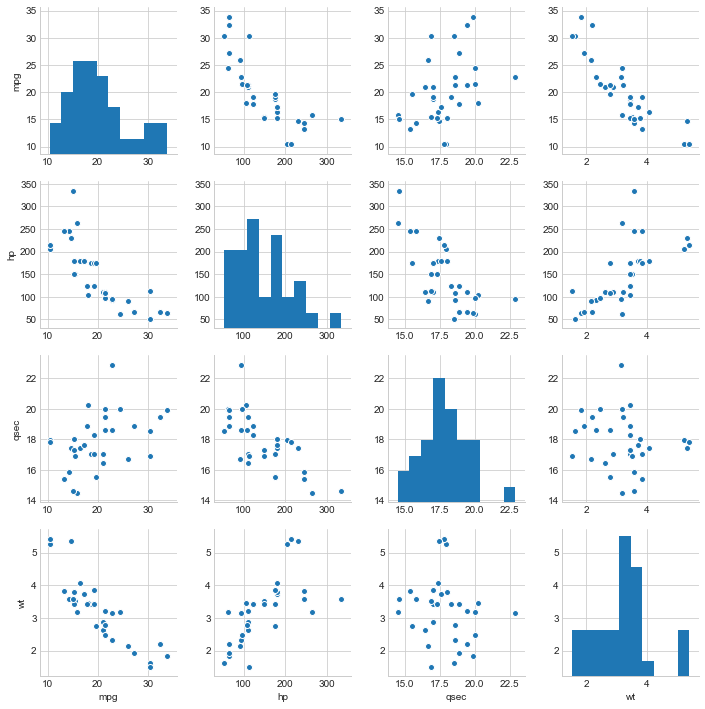

In [12]:
x = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(x)

### Using Scipy to Calculate the Pearson Correlation Coefficient

In [15]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

PearsonR Correlation Coefficient -0.776


In [17]:
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

PearsonR Correlation Coefficient 0.419


In [18]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

PearsonR Correlation Coefficient -0.868


### Using Pandas to Calculate the Pearson Correlation Coefficient

In [20]:
corr = x.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


### Using Seaborn to Visualize the Pearson Correlation Coefficient

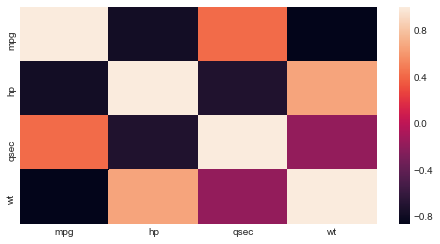

In [21]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Segment 5 - Delving into Non-Parametric Methods Using Pandas and Scipy

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy 
from scipy.stats import spearmanr

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
plt.style.use('seaborn-whitegrid')

### The Spearman Rank Correlation 

In [3]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


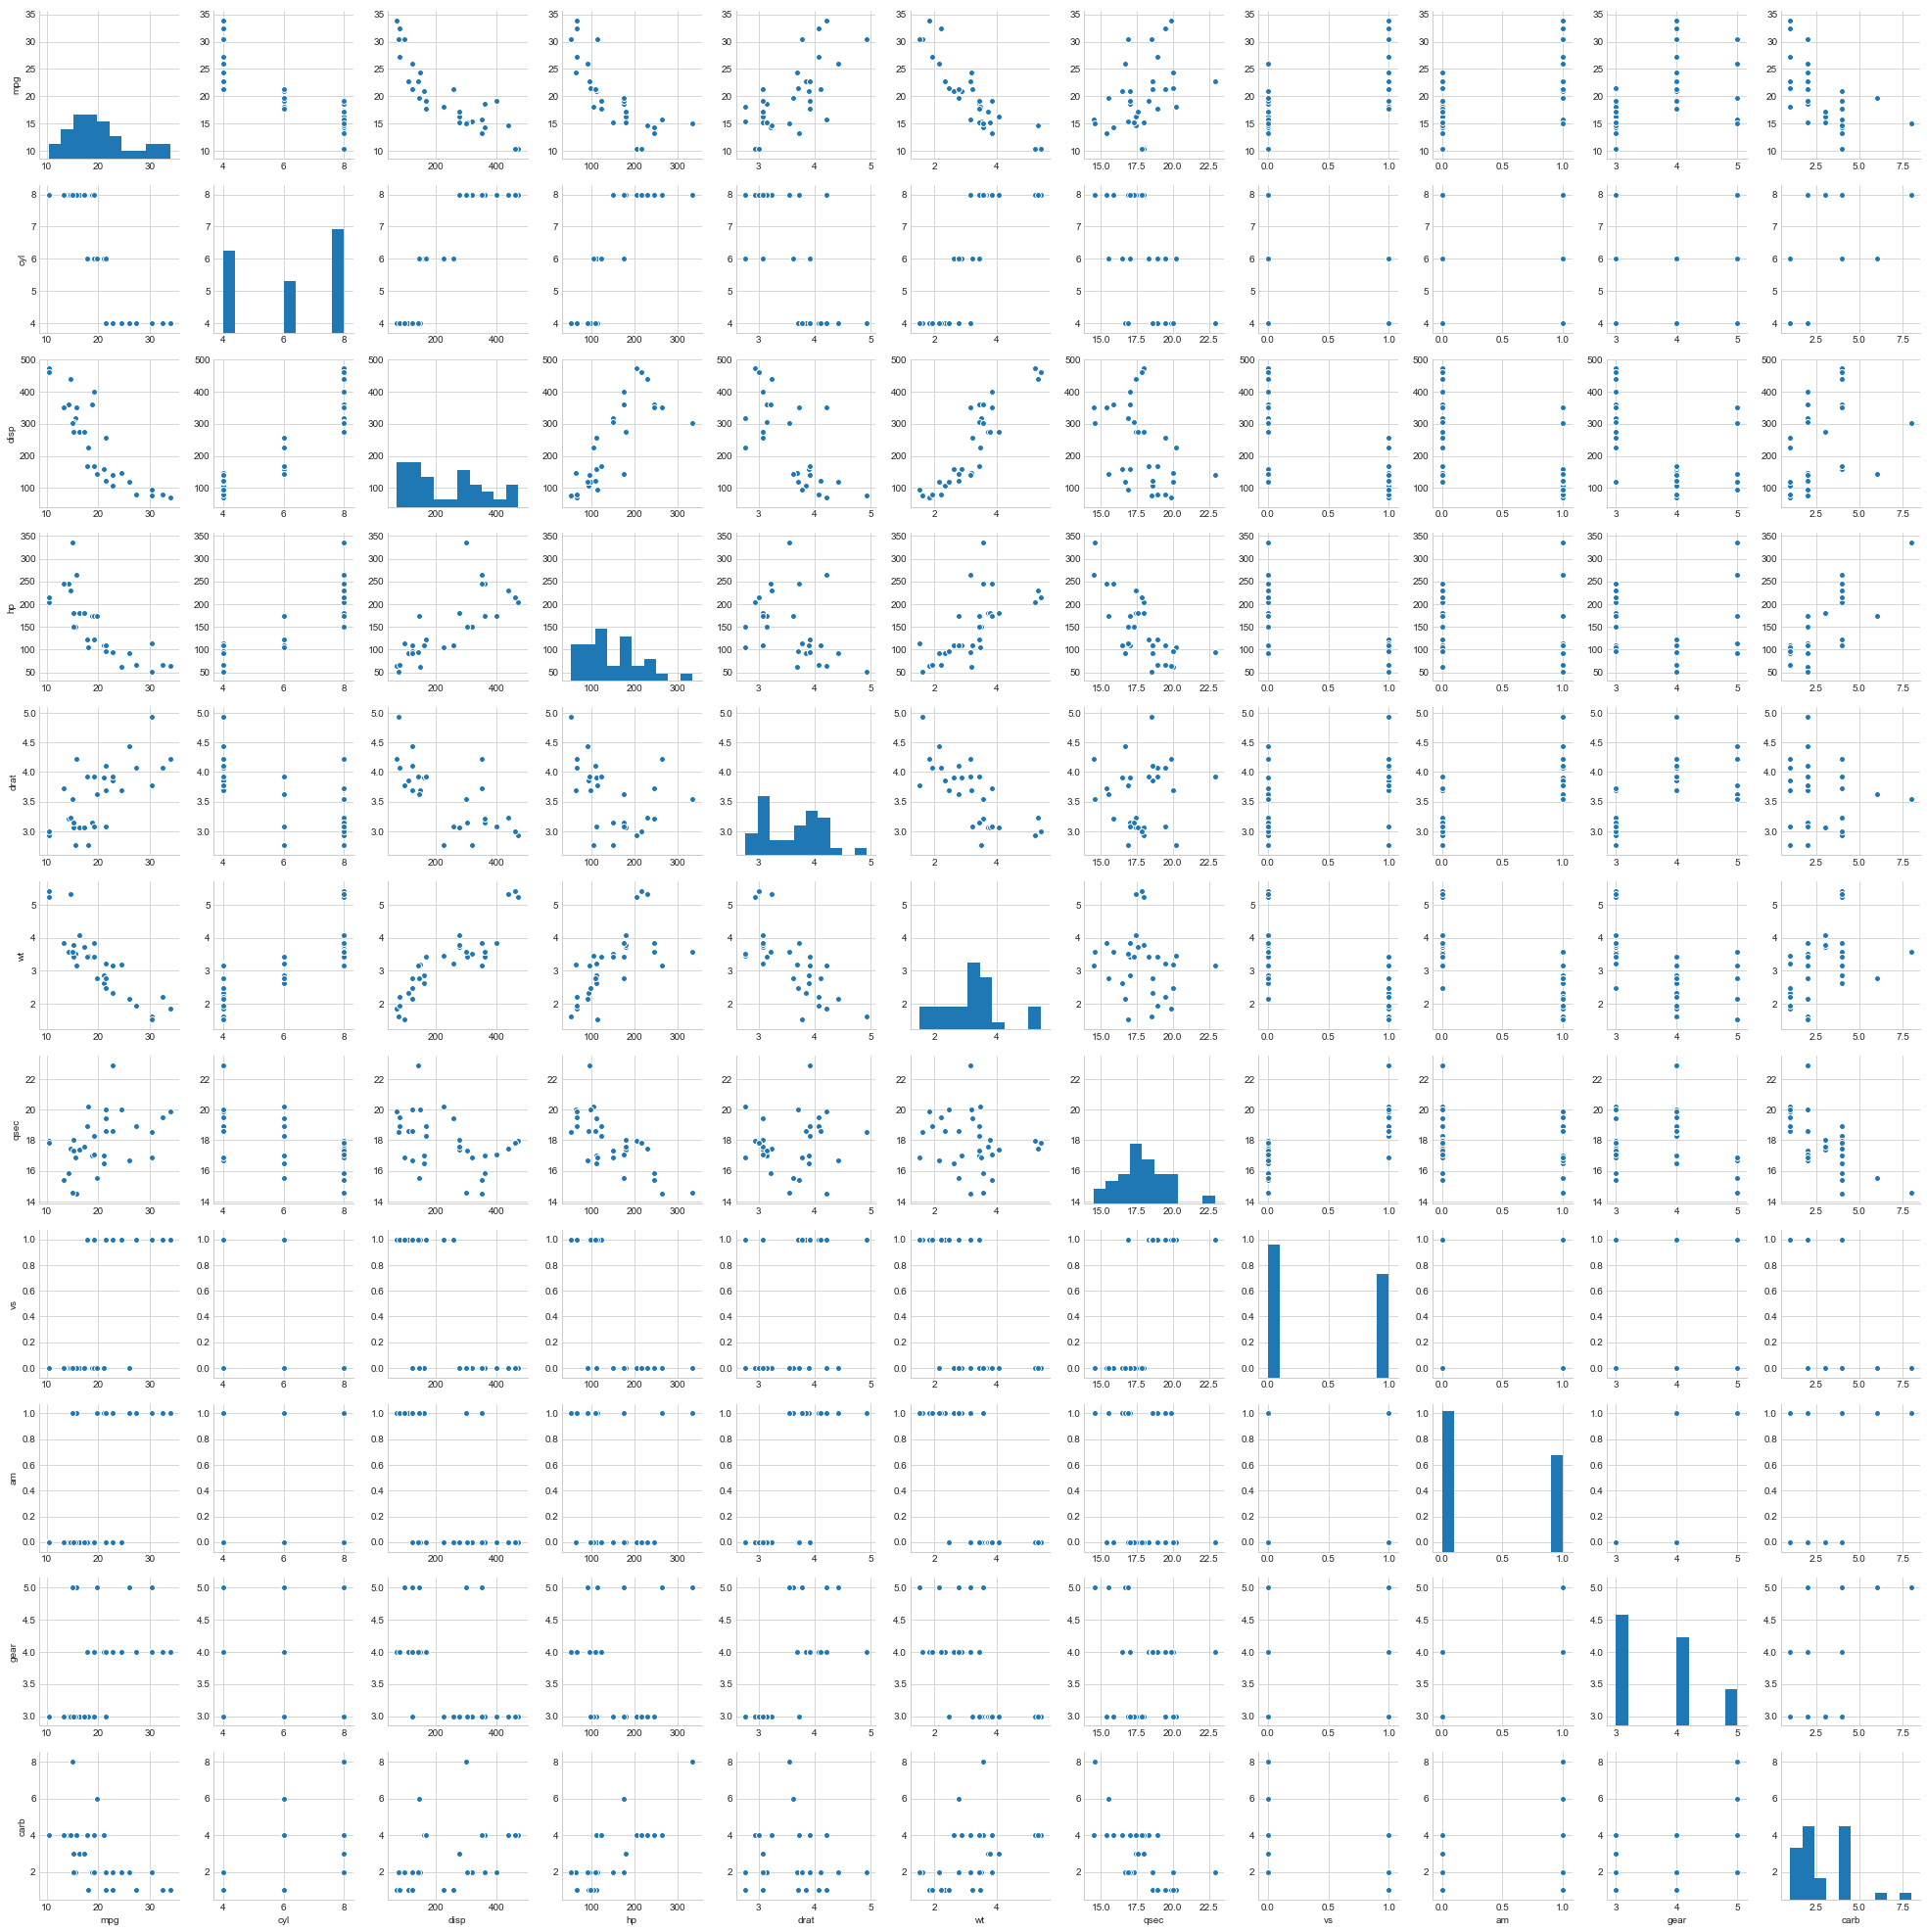

In [4]:
sb.pairplot(cars)

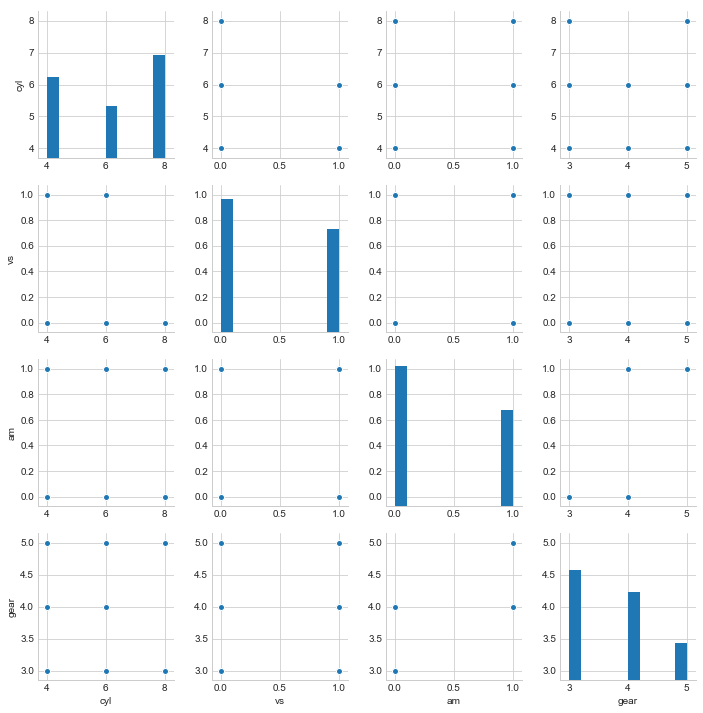

In [6]:
x = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(x)

In [7]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

In [8]:
spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient -0.814


In [9]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient -0.522


In [10]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient -0.564


### Chi-Square Test for Independence

In [12]:
table = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistics %0.3f p_value %0.3f' % (chi2, p)

Chi-square Statistics 8.741 p_value 0.013


In [14]:
table = pd.crosstab(cars['cyl'], cars['vs'])
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistics %0.3f p_value %0.3f' % (chi2, p)

Chi-square Statistics 21.340 p_value 0.000


In [13]:
table = pd.crosstab(cars['cyl'], cars['gear'])
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistics %0.3f p_value %0.3f' % (chi2, p)

Chi-square Statistics 18.036 p_value 0.001


## Segment 6 - Transforming Data Set Distributions

In [15]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [16]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Normalizing and Transforming Features with MinMaxScalar() and fit_transform()

In [17]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


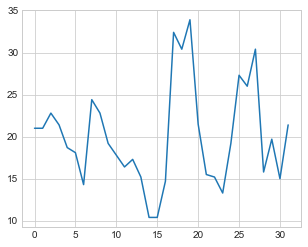

In [18]:
mpg = cars.mpg
plt.plot(mpg)

In [19]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


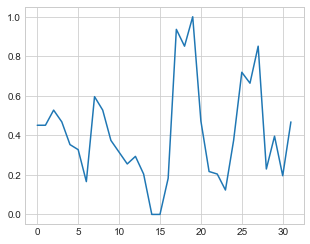

In [21]:
mpg_matrix = mpg.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


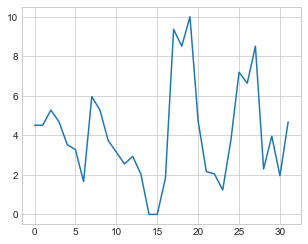

In [22]:
mpg_matrix = mpg.reshape(-1,1)
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))
scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

### Using Scale() to scale your feature

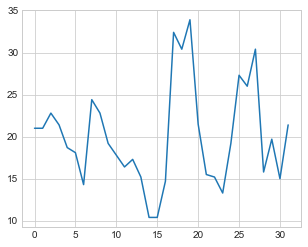

In [23]:
standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)

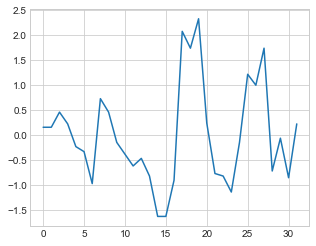

In [24]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)

# Chapter 4 - Dimensionality Reduction 

## Segment 2 - Explantory Factor Analysis

In [25]:
import numpy as np
import pandas as pd

import sklearn 
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

### Factor Analysis of Iris Dataset

In [28]:
iris =  datasets.load_iris()

X = iris.data

variable_names = iris.feature_names

X[0:10,]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [29]:
factor = FactorAnalysis().fit(x)

pd.DataFrame(factor.components_, columns=variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.553315,0.367555,0.279247,0.407189
1,0.140491,-0.165953,0.234090,0.338078
2,0.000000,0.000000,-0.000000,0.000000
3,-0.000000,-0.000000,-0.000000,0.000000


## Segment 3 - Principal Component Analysis (PCA)

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

In [6]:
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### PCA on Iris Data Set

In [9]:
iris = datasets.load_iris()
x = iris.data
variable_names = iris.feature_names
x[0:10,]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [13]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(x)

pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

In [14]:
pca.explained_variance_ratio_.sum()

1.0

In [15]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


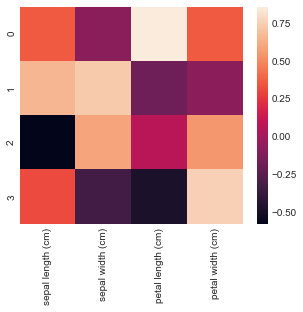

In [16]:
sb.heatmap(comps)

# Chapter 5 - Outlier Analysis

## Segment 1 - Extreme Value Analysis Using Univariate Methods

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [18]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [20]:
df = pd.read_csv(filepath_or_buffer= 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/iris.data.csv', header=None, sep=',' )

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
x = df.ix[:, 0:4].values
y = df.ix[:, 4].values
df[:5]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Identify Outliers from Tukey Boxplots

[]

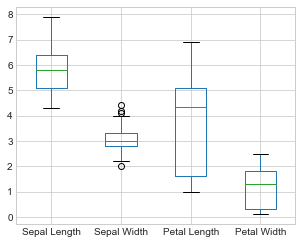

In [22]:
df.boxplot(return_type='dict')
plt.plot()

In [23]:
Sepal_Width = x[:, 1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [24]:
Sepal_Width = x[:, 1]
iris_outliers = (Sepal_Width < 2.05)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


### Applying Tuckey Outliers Labeling

In [25]:
pd.options.display.float_format = '{:.1f}'.format
x_df = pd.DataFrame(x)
print x_df.describe()

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


## Segment 2 - Multivariate Analysis for Outliers Detection

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Visualizing Inspecting Boxplots

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


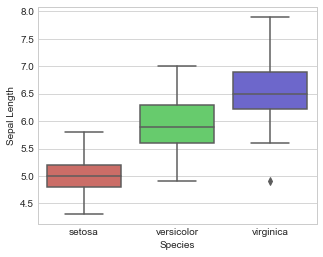

In [4]:
df = pd.read_csv(filepath_or_buffer= 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/iris.data.csv', header=None, sep=',' )

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
x = df.ix[:, 0:4].values
y = df.ix[:, 4].values
df[:5]

sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

### Looking at the Scatterplot Matrix

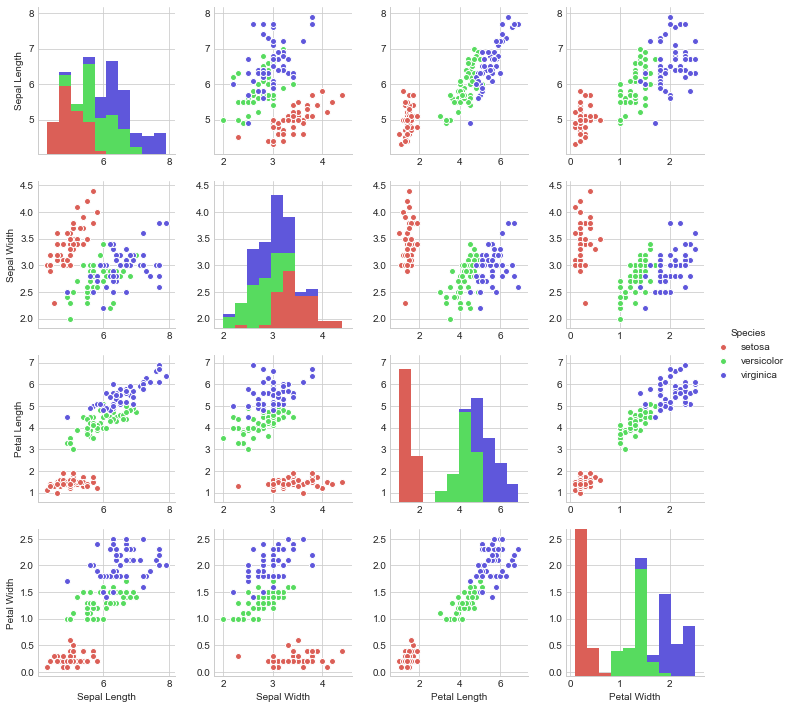

In [6]:
sb.pairplot(df, hue='Species', palette='hls')

## Segment 3 - DBSCan Clustering to Identify Outliers 

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter



In [9]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### DBSCan Clustering to Identify Outliers

#### Train Your Model and Identify Outliers

In [15]:
df = pd.read_csv(filepath_or_buffer= 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/iris.data.csv', header=None, sep=',' )

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
data = df.ix[:, 0:4].values
target = df.ix[:, 4].values
df[:5]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


### Visualize Your Results 

In [18]:
outliers_df = pd.DataFrame(data)

In [19]:
print Counter(model.labels_)
print outliers_df[model.labels_ == -1]

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5,1,u'DBSCAN for Outliers Detection')

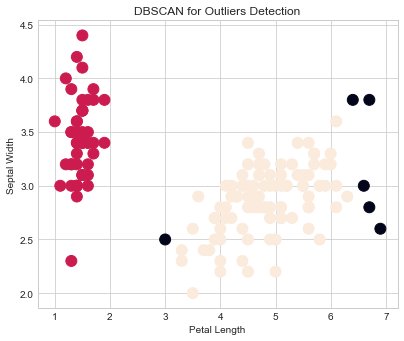

In [22]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,2], data[:, 1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Septal Width')

plt.title('DBSCAN for Outliers Detection')

# Chapter 6 - Cluster Analysis

## Segment 1 - K-means Method

### Setting up for clustering analysis

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
%matplotlib inline
plt.figure(figsize=(7,4))

In [7]:
iris = datasets.load_iris()

x = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
x[0:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

### Building and Running Your Model

In [9]:
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

### Ploting Your Model Outputs

In [11]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

Text(0.5,1,u'K-Means Classification')

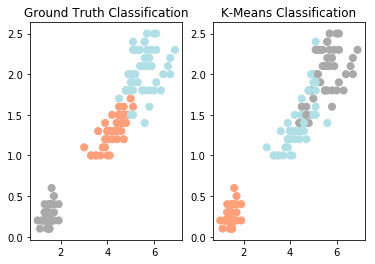

In [15]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

In [16]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

Text(0.5,1,u'K-Means Classification')

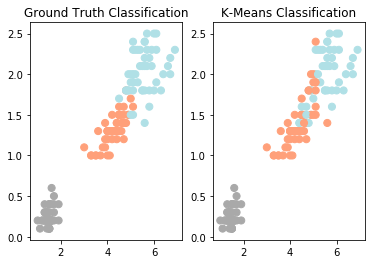

In [17]:
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

### Evaluate Your Clustering Results

In [18]:
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



## Segment 2 - Hierarchial Methods

### Setting Up for Clustering Analysis

In [2]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [4]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [5]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
x = cars.ix[:, (1, 3, 4, 6)].values
y= cars.ix[:, (9)].values

### Using Scipy to Generate Dendrograms

In [8]:
z = linkage(x, 'ward')

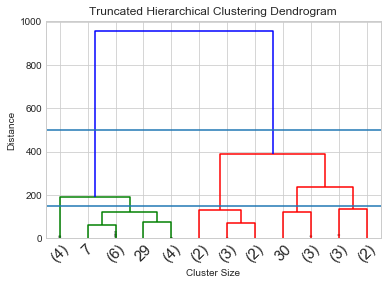

In [10]:
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

### Generating Hierarchical Clusters

In [11]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(x)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [12]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering.fit(x)

sm.accuracy_score(y, Hclustering.labels_)

0.4375

In [13]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(x)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [14]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(x)

sm.accuracy_score(y, Hclustering.labels_)

0.71875

## Segment 3 - Instance Based Learning w/k-Nearest Neighbor

### Setting Up for Classification Analysis

In [17]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from pylab import rcParams

import urllib

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [18]:
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

### Split Your Data into Test and Training DataSets

In [19]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [20]:
x_prime = cars.ix[:, (1, 3, 4, 6)].values
y = cars.ix[:, 9].values

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [22]:
x = preprocessing.scale(x_prime)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=17)

### Building and Training Your Model with Training Data

In [24]:
clf = neighbors.KNeighborsClassifier()

clf.fit(x_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


### Evaluating Your Model's Predictions Against the Test DataSet

In [25]:
y_expect = y_test
y_pred = clf.predict(x_test)

print metrics.classification_report(y_expect, y_pred)

             precision    recall  f1-score   support

          0       0.71      1.00      0.83         5
          1       1.00      0.67      0.80         6

avg / total       0.87      0.82      0.82        11



# Chapter 7 - Network Analysis with NetworkX

## Segment 2 - Working with Graph Objects

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import networkx as nx

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Creating Graph Objects

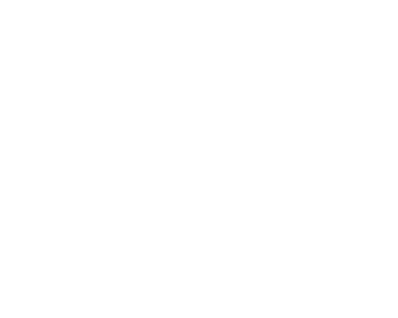

In [3]:
G = nx.Graph()
nx.draw(G)

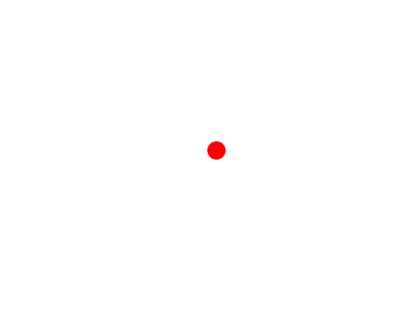

In [4]:
G.add_node(1)
nx.draw(G)

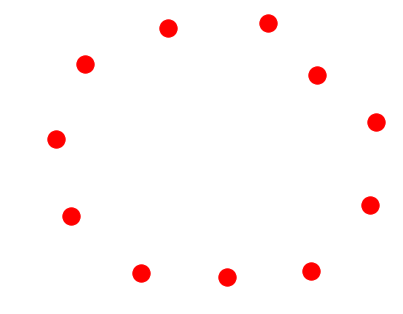

In [5]:
G.add_nodes_from([2,3,4,5,6,8,9,12,15,16])
nx.draw(G)

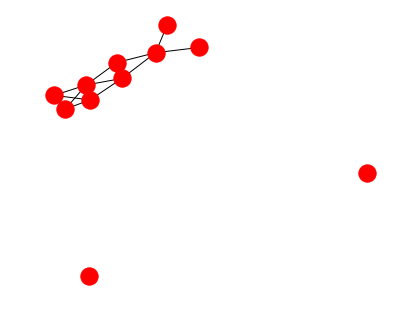

In [6]:
G.add_edges_from([(2,4),(2,6),(2,8),(2,12),(2,16),(3,6),(3,9), (3,12),(3,15),(4,8),(4,12),(4,16),(6,12),(8,16)])
nx.draw(G)

### The Basics about Drawing Graph Objects

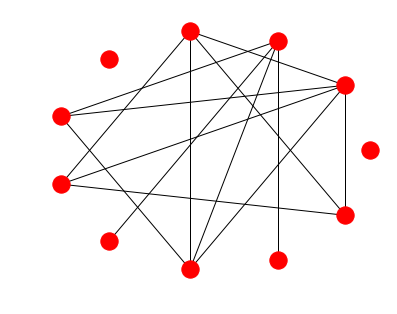

In [7]:
nx.draw_circular(G)

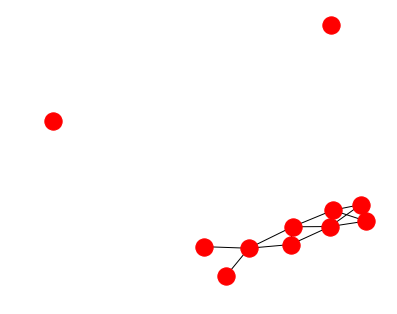

In [8]:
nx.draw_spring(G)

### Labeling and Coloring Your Graph Plots

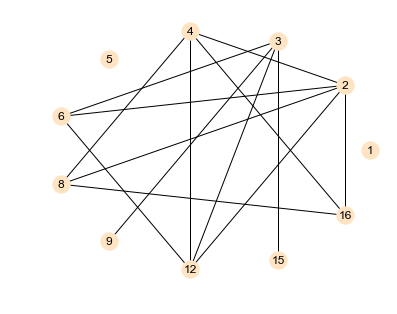

In [9]:
nx.draw_circular(G, node_color='bisque', with_labels=True)

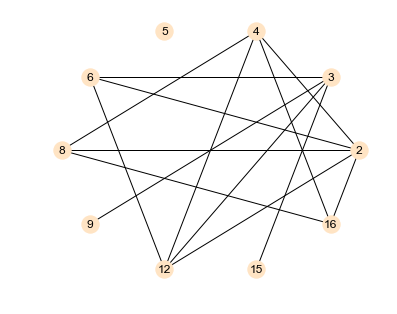

In [10]:
G.remove_node(1)
nx.draw_circular(G, node_color='bisque', with_labels=True)


### Identifying Graph Properties

In [11]:
sum_stats = nx.info(G)

In [12]:
print sum_stats

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 14
Average degree:   2.8000


In [13]:
print nx.degree(G)

[(2, 5), (3, 4), (4, 4), (5, 0), (6, 3), (8, 3), (9, 1), (12, 4), (15, 1), (16, 3)]


### Using Graph Generators

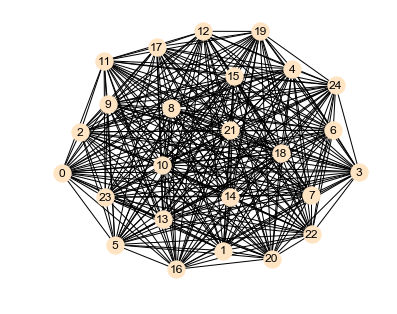

In [14]:
G = nx.complete_graph(25)
nx.draw(G, node_color='bisque', with_labels=True)

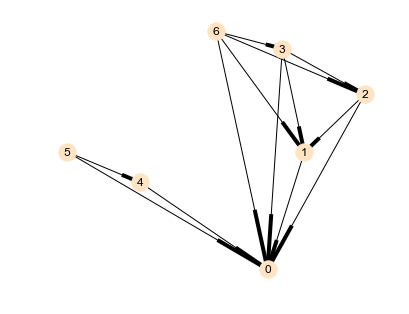

In [16]:
G = nx.gnc_graph(7, seed=25)
nx.draw(G, node_color='bisque', with_labels=True)

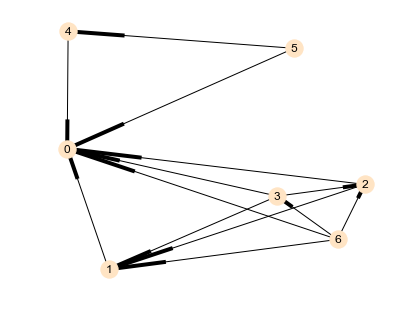

In [18]:
ego_G = nx.ego_graph(G, 3, radius=5)
nx.draw(G, node_color='bisque', with_labels=True)

# Chapter 7 - Network Analysis with NetworkX

### Segment 3 - Simulating a Social Network (ie; Directed Network Analysis)

In [1]:
import numpy as np
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt 
from pylab import rcParams
import seaborn as sb 

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Generating a graph object edgelist

In [3]:
DG = nx.gn_graph(7, seed=25) 

for line in nx.generate_edgelist(DG, data=False): print(line)

1 0
2 0
3 2
4 3
5 0
6 4


### Assigning Attributes to Nodes

In [4]:
print DG.node[0]

{}


In [5]:
DG.node[0]['name'] = 'Alice'

In [6]:
print DG.node[0]

{'name': 'Alice'}


In [7]:
DG.node[0]['name'] = 'Alice'
DG.node[1]['name'] = 'Bob'
DG.node[2]['name'] = 'Claire'
DG.node[3]['name'] = 'Dennis'
DG.node[4]['name'] = 'Esther'
DG.node[5]['name'] = 'Frank'
DG.node[6]['name'] = 'George'


In [8]:
DG.add_nodes_from([(0, {'age':25}), (1, {'age':31}), (2, {'age':18}), (3, {'age':47}), (4, {'age':22}), 
                   (5, {'age':23}), (6, {'age':50})])
print DG.node[0]

{'age': 25, 'name': 'Alice'}


In [9]:
DG.node[0]['gender'] = 'f'
DG.node[1]['gender'] = 'm'
DG.node[2]['gender'] = 'f'
DG.node[3]['gender'] = 'm'
DG.node[4]['gender'] = 'f'
DG.node[5]['gender'] = 'm'
DG.node[6]['gender'] = 'm'

### Visualize Your Network Graph

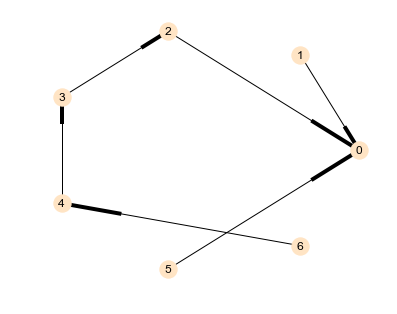

In [10]:
nx.draw_circular(DG, node_color='bisque', with_labels=True)

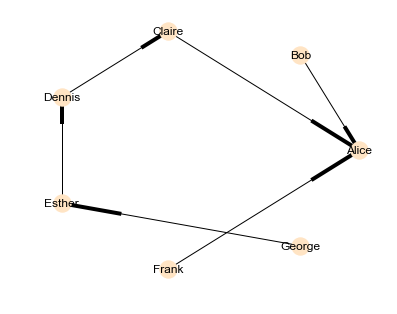

In [11]:
labeldict = {0: 'Alice', 1: 'Bob', 2: 'Claire', 3: 'Dennis', 4: 'Esther', 5: 'Frank', 6: 'George'}

nx.draw_circular(DG, labels=labeldict, node_color='bisque', with_labels=True)

In [12]:
G = DG.to_undirected()

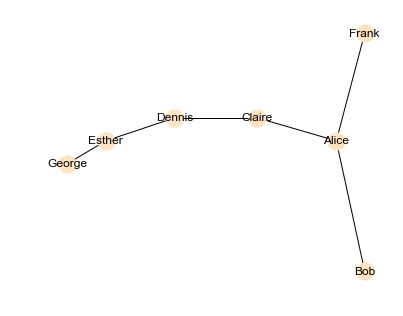

In [13]:
nx.draw_spectral(G, labels=labeldict, node_color='bisque', with_labels=True)

## Segment 4 - Analyzing a Social Nework

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import networkx as nx

In [18]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [19]:
DG = nx.gn_graph(7, seed=25) 

for line in nx.generate_edgelist(DG, data=False):
    print(line)
    
DG.node[0]['name'] = 'Alice'
DG.node[1]['name'] = 'Bob'
DG.node[2]['name'] = 'Claire'
DG.node[3]['name'] = 'Dennis'
DG.node[4]['name'] = 'Esther'
DG.node[5]['name'] = 'Frank'
DG.node[6]['name'] = 'George'


1 0
2 0
3 2
4 3
5 0
6 4


In [20]:
G = DG.to_undirected()

In [21]:
print nx.info(DG)

Name: 
Type: DiGraph
Number of nodes: 7
Number of edges: 6
Average in degree:   0.8571
Average out degree:   0.8571


### Considering Degress in a Social Network

In [23]:
DG.degree()

DiDegreeView({0: 3, 1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1})

### Identify Successor Nodes

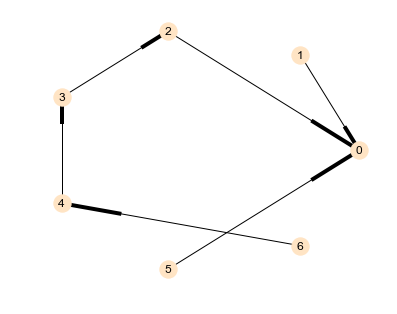

In [32]:
nx.draw_circular(DG, node_color='bisque', with_labels=True)

In [33]:
DG.successors(3)

<dictionary-keyiterator at 0xfb2c368>

In [34]:
DG.neighbors(3)

<dictionary-keyiterator at 0xf8b4778>

In [35]:
G.neighbors(4)

<dictionary-keyiterator at 0xfa1b9f8>

In [36]:
DG

In [38]:
print nx.info(DG)

Name: 
Type: DiGraph
Number of nodes: 7
Number of edges: 6
Average in degree:   0.8571
Average out degree:   0.8571


In [39]:
print DG

In [44]:
DG.successors(3)

<dictionary-keyiterator at 0xf165b88>

# Chapter 8 - Basic Algorithm Learning

## Segment 1 - Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### (Multiple) Linear Regression on the Enrollment Data

In [4]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/enrollment_forecast.csv'

In [5]:
enroll = pd.read_csv(address)
enroll.colums = ['year', 'roll', 'unem', 'hgrad', 'inc']

In [6]:
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


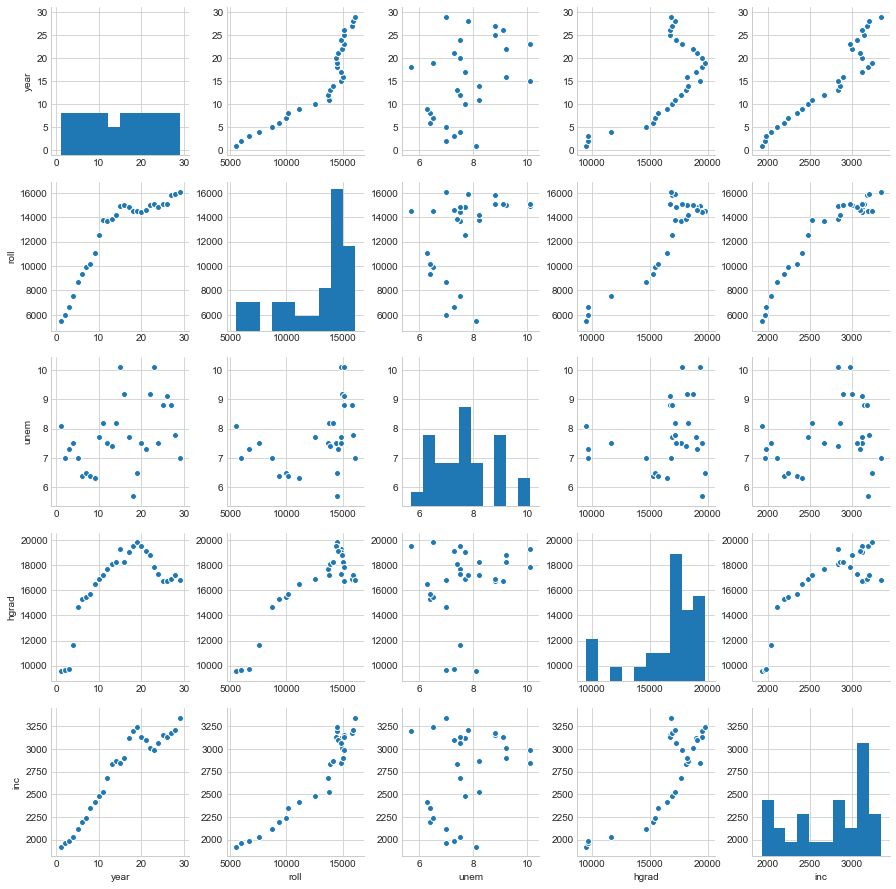

In [7]:
sb.pairplot(enroll)

In [9]:
print enroll.corr()

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [10]:
enroll_data = enroll.ix[:,(2,3)].values
enroll_target = enroll.ix[:, 1].values
enroll_data_names = ['unem', 'hgrad']

x,y = scale(enroll_data), enroll_target

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


### Checking for Missing Values

In [11]:
missing_values = x == np.NAN
x[missing_values == True]

array([], dtype=float64)

In [12]:
LinReg = LinearRegression(normalize = True)

LinReg.fit(x,y)

LinReg.score(x,y)

0.84888126661337227

##  Segment 2 - Logistic Regression

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn import preprocessing

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [4]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
cars_data = cars.ix[:, (5,11)].values
cars_data_names = ['drat', 'carb']

y = cars.ix[:, 9].values

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


### Checking for Independence Between Features

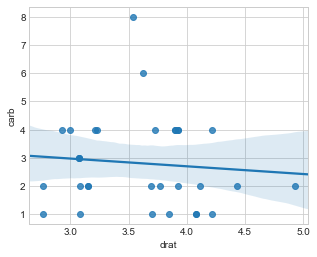

In [6]:
sb.regplot(x='drat', y='carb', data=cars, scatter=True)

In [7]:
drat = cars['drat']
carb = cars['carb']

spearmanr_coefficient, p_value = spearmanr(drat, carb)
print 'Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

Spearman Rank Correlation Coefficient -0.125


### Checking for Missing Values

In [8]:
cars.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

### Checking that Your Target is Binary or Ordinal

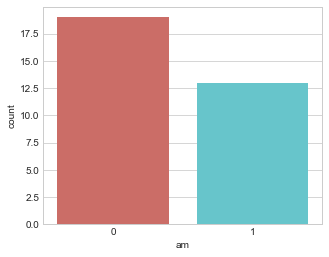

In [9]:
sb.countplot(x='am', data=cars, palette='hls')

### Checking that Your Dataset Size is Sufficient

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_names    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### Deploying and Evaluating Your Model

In [11]:
x = scale(cars_data)

In [13]:
LogReg = LogisticRegression()

LogReg.fit(x,y)
print LogReg.score(x,y)

0.8125


In [15]:
y_pred = LogReg.predict(x)

from sklearn.metrics import classification_report 
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32



## Segment 3 - Naive Bayes Classifiers

In [1]:
import numpy as np
import pandas as pd


import urllib 

import sklearn
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

In [19]:
raw_data = "C:/Users/TehmeerAli/Desktop/Tensorflow/data/spambase.data.txt"

In [20]:
dataset = np.loadtxt(raw_data, delimiter=",")

In [21]:
print dataset[0]

[   0.       0.64     0.64     0.       0.32     0.       0.       0.       0.
    0.       0.       0.64     0.       0.       0.       0.32     0.
    1.29     1.93     0.       0.96     0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.778
    0.       0.       3.756   61.     278.       1.   ]


In [22]:
x = dataset[:, 0:48]

In [23]:
y = dataset[:, -1]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.33, random_state=17)

In [27]:
BernNB = BernoulliNB(binarize = True)

In [28]:
BernNB.fit(x_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(x_test)
print accuracy_score(y_expect, y_pred)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.855826201448


In [30]:
MultiNB = MultinomialNB()

MultiNB.fit(x_train, y_train)
print(MultiNB)

y_pred = MultiNB.predict(x_test)
print accuracy_score(y_expect, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.873601053325


In [31]:
GausNB = GaussianNB()
GausNB.fit(x_train, y_train)
print(GausNB)

y_pred = GausNB.predict(x_test)
print accuracy_score(y_expect, y_pred)


GaussianNB(priors=None)
0.813034891376


In [32]:
BernNB = BernoulliNB(binarize = 0.1)

In [33]:
BernNB.fit(x_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(x_test)
print accuracy_score(y_expect, y_pred)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.895325872284


# Chapter 9 - Web  Based Data Visualization with Plotly

## Segment 2 - Basic Charts

### Setting up to use Plotly with Jupiter

In [1]:
! pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\TehmeerAli\AppData\Local\pip\Cache\wheels\11\0e\f6\22208411ddcbfa81a89ae341490c5d12b1df5be988aad494b6
Successfully built plotly


In [2]:
! pip install cufflinks

  Running setup.py bdist_wheel for cufflinks: started
  Running setup.py bdist_wheel for cufflinks: finished with status 'done'
  Stored in directory: C:\Users\TehmeerAli\AppData\Local\pip\Cache\wheels\9d\31\82\40faec2196f9c615b235219f4ae076958c544fa525a4155f42
  Running setup.py bdist_wheel for colorlover: started
  Running setup.py bdist_wheel for colorlover: finished with status 'done'
  Stored in directory: C:\Users\TehmeerAli\AppData\Local\pip\Cache\wheels\b8\b0\18\76d3f3088cc73950ed1aa44ea074b93ed37309fea57dec78dc
Successfully built cufflinks colorlover


In [1]:
import numpy as np
import pandas as pd

import cufflinks as cf

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

In [2]:
tls.set_credentials_file(username='TehmeerAli', api_key='aak6xe5HBc7IWt9PNagu')

### Creating Line Charts

#### A very basic line charts

In [3]:
a = np.linspace(start=0, stop=36, num=36)

np.random.seed(25)

b = np.random.uniform(low=0.0, high=1.0, size=36)

trace = go.Scatter(x=a, y=b)

data= [trace]

py.iplot(data, filename= 'basic-line-chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~TehmeerAli/0 or inside your plot.ly account where it is named 'basic-line-chart'


#### A line chate with more than one variable ploted

In [4]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 2, 3, 4, 0, 4, 3, 2, 1]
z = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

trace0 =  go.Scatter(x=x, y=y, name='List Object', line = dict(width=5))
trace1 =  go.Scatter(x=x, y=z, name='List Object', line = dict(width=10))

data = [trace0, trace1]

layout = dict(title='Double Line Chart', xaxis = dict(title='x-axis'), yaxis = dict(title='y-axis'))
print layout

{'yaxis': {'title': 'y-axis'}, 'xaxis': {'title': 'x-axis'}, 'title': 'Double Line Chart'}


In [5]:
fig = dict(data=data, layout=layout)
print fig

{'layout': {'yaxis': {'title': 'y-axis'}, 'xaxis': {'title': 'x-axis'}, 'title': 'Double Line Chart'}, 'data': [{'y': [1, 2, 3, 4, 0, 4, 3, 2, 1], 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'line': {'width': 5}, 'type': 'scatter', 'name': 'List Object'}, {'y': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'line': {'width': 10}, 'type': 'scatter', 'name': 'List Object'}]}


In [6]:
py.iplot(fig, filename='styled-line-chart')

#### A line chart from pandas dataframe

In [7]:
address = 'C:/Users/TehmeerAli/Desktop/Tensorflow/Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

df = cars[['cyl', 'wt', 'mpg']]

layout = dict(title= 'Chart From Pandas DataFrame', xaxis = dict(title='x-axis'), yaxis = dict(title='y-axis'))

df.iplot(filename='cf-sample-line-chart', layout=layout)

### Creating Bar Charts

In [8]:
data = [go.Bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], y=[1, 2, 3, 4, 0.5, 4, 3, 2, 1])]
print data

[{'y': [1, 2, 3, 4, 0.5, 4, 3, 2, 1], 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'type': 'bar'}]


In [9]:
layout = dict(title='Simple Bar Chart',
             xaxis = dict(title='x-axis'),
             yaxis = dict(title='y-axis'))

py.iplot(data, filename='basic-bar-chart', layout=layout)

# Chapter 10 - Web Scraping with Beautiful Soup

## Working with Objects

In [10]:
! pip install BeautifulSoup

  Running setup.py bdist_wheel for BeautifulSoup: started
  Running setup.py bdist_wheel for BeautifulSoup: finished with status 'done'
  Stored in directory: C:\Users\TehmeerAli\AppData\Local\pip\Cache\wheels\5e\be\6d\ed01d5d434a821557b674c9da976f60b1b93d9009447eb9d16
Successfully built BeautifulSoup


In [1]:
from bs4 import BeautifulSoup

### The BeautifulSoup Object

In [12]:
html_doc = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''

In [14]:
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup)


<html><head><title>Best Books</title></head>
<body>
<p class="title"><b>DATA SCIENCE FOR DUMMIES</b></p>
<p class="description">Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br/><br/>
Edition 1 of this book:
        <br/>
<ul>
<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>
</ul>
<br/><br/>
What to do next:
<br/>
<a class="preview" href="http://www.data-mania.com/blog/books-by-lillian-pierson/" id=

In [15]:
print soup.prettify()[0:350]

<html>
 <head>
  <title>
   Best Books
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    DATA SCIENCE FOR DUMMIES
   </b>
  </p>
  <p class="description">
   Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
   <br/


### Tag Objects

#### Working with Names

In [17]:
soup = BeautifulSoup('<b body= "description">Product Description</b>', 'html' )

tag = soup.b
type(tag)

bs4.element.Tag

In [18]:
print tag

<b body="description">Product Description</b>


In [19]:
tag.name

'b'

In [20]:
tag.name = 'bestbooks'

In [21]:
print tag

<bestbooks body="description">Product Description</bestbooks>


#### Working with Attributes

In [22]:
tag['body']

'description'

In [23]:
tag.attrs

{'body': 'description'}

In [24]:
tag['id'] =3

In [25]:
tag.attrs

{'body': 'description', 'id': 3}

In [26]:
tag

<bestbooks body="description" id="3">Product Description</bestbooks>

In [27]:
del tag['body']
del tag['id']
tag
        

<bestbooks>Product Description</bestbooks>

In [28]:
tag.attrs

{}

#### Using Tags to Navigate a Tree

In [29]:
html_doc = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''

soup = BeautifulSoup(html_doc, 'html.parser')

In [30]:
soup.head

<head><title>Best Books</title></head>

In [31]:
soup.title

<title>Best Books</title>

In [32]:
soup.body.b

<b>DATA SCIENCE FOR DUMMIES</b>

In [33]:
soup.ul

<ul>\n<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>\n<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>\n<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>\n<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>\n</ul>

In [34]:
soup.a

<a class="preview" href="http://www.data-mania.com/blog/books-by-lillian-pierson/" id="link 1">See a preview of the book</a>

## Exploring Navigable Spring Objects

### The Beautiful Soup Object

In [35]:
soup = BeautifulSoup('<b body="description">Product Description</b>')

### NavigableString Objects

In [36]:
tag = soup.b
type(tag)

bs4.element.Tag

In [37]:
tag.name

'b'

In [38]:
tag.string

u'Product Description'

In [39]:
type(tag.string)

bs4.element.NavigableString

In [41]:
nav_string = tag.string
print nav_string

Product Description


In [42]:
nav_string.replace_with('Null')
tag.string

u'Null'

### Work with Navigatable String Objects

In [2]:
html_doc = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''



In [3]:
soup = BeautifulSoup(html_doc, 'html.parser')

In [4]:
for string in soup.stripped_strings:
    print(repr(string))

u'Best Books'
u'DATA SCIENCE FOR DUMMIES'
u'Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe'
u'Edition 1 of this book:'
u'Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis'
u'Details different data visualization techniques that can be used to showcase and summarize your data'
u'Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques'
u'Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark'
u'What to do next:'
u'See a preview of the book'
u','
u'get the free pdf download,'
u'and then'
u'buy the book!'
u'...'


In [6]:
title_tag = soup.title
title_tag

<title>Best Books</title>

In [7]:
title_tag.parent

<head><title>Best Books</title></head>

In [8]:
title_tag.string

u'Best Books'

In [9]:
title_tag.string.parent

<title>Best Books</title>

## Segment 3 - Data Parsing

In [10]:
import pandas as pd

In [11]:
import re

In [12]:
r = '''
<html><head><title>Best Books</title></head>
<body>
<p class='title'><b>DATA SCIENCE FOR DUMMIES</b></p>

<p class='description'>Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe
<br><br>
Edition 1 of this book:
        <br>
 <ul>
  <li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>
  <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>
  <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>
  <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>   
  </ul>
<br><br>
What to do next:
<br>
<a href='http://www.data-mania.com/blog/books-by-lillian-pierson/' class = 'preview' id='link 1'>See a preview of the book</a>,
<a href='http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/' class = 'preview' id='link 2'>get the free pdf download,</a> and then
<a href='http://bit.ly/Data-Science-For-Dummies' class = 'preview' id='link 3'>buy the book!</a> 
</p>

<p class='description'>...</p>
'''



In [14]:
soup = BeautifulSoup(r, 'lxml')
type(soup)

bs4.BeautifulSoup

### Parsing Your Data

In [15]:
print soup.prettify()[0:100]

<html>
 <head>
  <title>
   Best Books
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    DA


### Getting Data from a Parse Tree

In [16]:
text_only = soup.get_text()
print(text_only)

Best Books

DATA SCIENCE FOR DUMMIES
Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe

Edition 1 of this book:
        

Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis
Details different data visualization techniques that can be used to showcase and summarize your data
Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques
Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark


What to do next:

See a preview of the book,
get the free pdf download, and then
buy the book!
...



### Searching and Retrieving Data from a Parse Tree

#### Retrieving Tags by Filtering by Name Arguments

In [17]:
soup.find_all('li')

[<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>,
 <li>Details different data visualization techniques that can be used to showcase and summarize your data</li>,
 <li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>,
 <li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>]

#### Retrieving Tags by Filtering by Keyword Arguments

In [18]:
soup.find_all(id="link 3")

[<a class="preview" href="http://bit.ly/Data-Science-For-Dummies" id="link 3">buy the book!</a>]

#### Retrieving Tags by Filtering with String Arguments

In [19]:
soup.find_all('ul')

[<ul>\n<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>\n<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>\n<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>\n<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>\n</ul>]

#### Retrieving Tags by Filtering with List Objects

In [20]:
soup.find_all(['ul', 'b'])

[<b>DATA SCIENCE FOR DUMMIES</b>,
 <ul>\n<li>Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis</li>\n<li>Details different data visualization techniques that can be used to showcase and summarize your data</li>\n<li>Explains both supervised and unsupervised machine learning, including regression, model validation, and clustering techniques</li>\n<li>Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark</li>\n</ul>]

#### Retrieving Tags by Filtering with Regular Expressions

In [21]:
l  = re.compile('l')

for tag in soup.find_all(l):
    print(tag.name)

html
title
ul
li
li
li
li


#### Retrieving Tags by Filtering with Boolean Values

In [22]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
br
br
br
ul
li
li
li
li
br
br
br
a
a
a
p


#### Retrieving Weblinks by Filtering with String Objects

In [23]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://www.data-mania.com/blog/books-by-lillian-pierson/
http://www.data-mania.com/blog/data-science-for-dummies-answers-what-is-data-science/
http://bit.ly/Data-Science-For-Dummies


#### Retrieving Strings by Filtering with Regular Expressions

In [24]:
soup.find_all(string = re.compile("data"))

[u'Jobs in data science abound, but few people have the data science skills needed to fill these increasingly important roles in organizations. Data Science For Dummies is the pe\n',
 u'Provides a background in data science fundamentals before moving on to working with relational databases and unstructured data and preparing your data for analysis',
 u'Details different data visualization techniques that can be used to showcase and summarize your data',
 u'Includes coverage of big data processing tools like MapReduce, Hadoop, Storm, and Spark']

## Segment 4 - Web Scraping

In [25]:
import urllib

In [26]:
r = urllib.urlopen('https://analytics.usa.gov').read()

In [28]:
soup = BeautifulSoup(r, 'lxml')
type(soup)

bs4.BeautifulSoup

### Scraping a Web Page and Saving Your Results

In [29]:
print soup.prettify()[0:100]

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--



In [30]:
for link in soup.find_all('a'):
    print(link.get('href'))

/
#explanation
https://analytics.usa.gov/data/
data/
#top-pages-realtime
#top-pages-7-days
#top-pages-30-days
https://analytics.usa.gov/data/live/all-pages-realtime.csv
https://analytics.usa.gov/data/live/all-domains-30-days.csv
https://www.digitalgov.gov/services/dap/
https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4
https://support.google.com/analytics/answer/2763052?hl=en
https://analytics.usa.gov/data/live/second-level-domains.csv
https://analytics.usa.gov/data/live/sites.csv
mailto:DAP@support.digitalgov.gov
https://github.com/GSA/analytics.usa.gov
https://github.com/18F/analytics-reporter
https://github.com/GSA/analytics.usa.gov/issues
mailto:DAP@support.digitalgov.gov
https://analytics.usa.gov/data/


In [33]:
for link in soup.findAll('a', attrs={'href': re.compile("^http")}):
    print link

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 4500 total websites</a>
<a class="external-link" href="https://github.com/GSA/analytics.usa.gov">code for this website</a>
<a class="external-link" href="https:

In [34]:
file = open('C:/Users/TehmeerAli/Desktop/Tensorflow/Data/parsed_data.txt', 'wb')

In [36]:
for link in soup.findAll('a', attrs={'href': re.compile("^http")}):
    soup_link = str(link)
    print(soup_link)
    file.write(soup_link)
    file.flush()
    file.close()

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>


ValueError: I/O operation on closed file